In [6]:
#from keras import applications
#from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
#from keras.layers import LeakyReLUb
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
import sklearn.metrics as sm
import xgboost

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.decomposition import PCA

import pickle

In [157]:
df = pd.read_csv('basedata_incan01-3_rev1_newadd5.csv')
df2 = pd.read_csv('error.csv')
df3 = pd.read_csv('error_2.csv')

In [158]:
df = df.replace(np.nan, 0)
df2 = df2.replace(np.nan, 0)
#df.info()
df.shape

(3817, 25)

In [159]:
#df2 = df2.drop(['Pred_L','Pred_a','Pred_b','Delta_E'],axis=1)
df2

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,UT578_AF,UT578_AS,UT6581,Pred_L,Pred_a,Pred_b,Target_L,Target_a,Target_b,Delta_E
0,0.0,0.0,0.0,0.0,0.0,19,474.0,12.0,0.0,0,...,0,1,0,87.850110,-3.978281,72.724350,86.55,-1.74,70.58,3.361314
1,0.0,0.0,0.0,0.0,0.0,0,143.0,62.0,0.0,0,...,0,0,1,87.102060,0.761475,51.853520,86.01,2.14,49.60,2.858544
2,0.0,0.0,0.0,0.0,0.0,17,443.0,19.0,0.0,0,...,0,0,1,86.817640,-1.234771,70.960490,85.83,-1.19,69.24,1.984318
3,0.0,0.0,0.0,0.0,0.0,17,443.0,19.0,0.0,0,...,0,0,1,86.766290,-2.363051,69.659850,85.83,-1.19,69.24,1.558512
4,0.0,0.0,0.0,0.0,0.0,0,143.0,62.0,0.0,0,...,0,0,1,86.258480,1.412499,51.035160,86.01,2.14,49.60,1.628092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0.0,604.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,1,0,0,27.031713,6.606680,2.125061,28.05,4.31,0.89,2.799468
2493,0.0,604.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,1,0,0,26.931673,6.366104,0.541939,28.05,4.31,0.89,2.366298
2494,0.0,1040.0,0.0,0.0,0.0,0,80.0,0.0,0.0,0,...,0,0,1,26.680399,0.270097,-0.708141,28.03,0.20,-1.40,1.518225
2495,0.0,604.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,1,0,0,26.400187,5.742626,0.570665,28.05,4.31,0.89,2.208229


In [160]:
df2 = df2.drop_duplicates()
df2 = df2[df2['Delta_E']>3.0]
df2

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,UT578_AF,UT578_AS,UT6581,Pred_L,Pred_a,Pred_b,Target_L,Target_a,Target_b,Delta_E
0,0.0,0.0,0.0,0.0,0.0,19,474.0,12.0,0.0,0,...,0,1,0,87.850110,-3.978281,72.724350,86.55,-1.74,70.58,3.361314
7,0.0,0.0,0.0,0.0,0.0,0,264.0,81.0,0.0,0,...,1,0,0,85.054170,3.423016,55.678410,84.25,6.85,56.00,3.534731
28,0.0,0.0,0.0,0.0,6.0,20,350.0,26.0,0.0,0,...,1,0,0,83.550285,-4.968510,58.775550,85.12,-7.51,60.59,3.495054
31,0.0,0.0,0.0,0.0,0.0,0,264.0,81.0,0.0,0,...,1,0,0,83.319800,6.647123,53.053577,84.25,6.85,56.00,3.096423
32,0.0,0.0,0.0,0.0,6.0,20,350.0,26.0,0.0,0,...,1,0,0,83.312140,-4.441463,57.436540,85.12,-7.51,60.59,4.756952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,0.0,8.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1082,...,1,0,0,30.310757,18.943476,-10.455704,31.01,22.69,-9.37,3.962845
2431,0.0,0.0,0.0,1023.0,0.0,0,10.0,0.0,0.0,0,...,0,0,1,30.310375,1.327486,-19.586155,31.04,2.52,-22.33,3.079469
2439,0.0,8.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1082,...,1,0,0,29.908382,19.695023,-9.472014,31.01,22.69,-9.37,3.192782
2453,0.0,273.0,0.0,0.0,850.0,0,78.0,0.0,0.0,0,...,1,0,0,29.378407,-8.309895,-0.979633,28.15,-5.14,-1.80,3.497173


In [161]:
df3

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,UT578_AF,UT578_AS,UT6581,Pred_L,Pred_a,Pred_b,Target_L,Target_a,Target_b,Delta_E
0,0.0,44.0,0,138.0,0,0,14.0,0,0,0,...,1,0,0,51.501213,-3.203348,-10.946395,50.01,-3.13,-12.28,2.001899
1,4.0,0.0,0,0.0,0,0,0.0,0,464,0,...,0,0,1,61.677784,33.583450,24.378870,61.51,31.71,23.68,2.006586
2,0.0,22.0,0,0.0,0,800,0.0,136,0,0,...,0,0,0,48.391083,19.343187,27.375513,47.08,18.95,25.90,2.012628
3,0.0,0.0,0,550.0,0,0,3.0,0,0,0,...,0,1,0,39.289680,-1.569784,-33.237217,38.09,0.04,-33.03,2.018310
4,0.0,0.0,0,0.0,350,50,145.0,0,0,0,...,1,0,0,60.415756,-46.378963,20.237482,59.08,-46.60,18.74,2.018800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.0,8.0,0,0.0,0,0,110.0,400,0,0,...,1,0,0,51.933495,36.993370,31.511034,54.05,40.97,35.24,5.847937
122,0.0,0.0,0,218.0,0,0,0.0,0,0,0,...,1,0,0,54.340470,-5.857334,-38.015514,57.46,-8.20,-42.53,5.966585
123,7.0,0.0,0,0.0,0,0,429.0,0,0,0,...,0,1,0,44.914936,49.783070,29.119665,46.74,54.71,31.99,5.987013
124,15.0,0.0,0,0.0,0,0,330.0,680,6,0,...,0,0,1,69.096910,19.133530,66.410110,72.05,19.92,71.67,6.083233


In [162]:
df2 = df2.drop(['Pred_L','Pred_a','Pred_b','Delta_E'],axis=1)
df3 = df3.drop(['Pred_L','Pred_a','Pred_b','Delta_E'],axis=1)

In [163]:
df = df.dropna()
df = df.drop_duplicates()
#df = df.drop(['sum'],axis=1)

In [164]:
df.shape

(3729, 25)

In [165]:
df

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,1500.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.51,26.91,80.41
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,60.92,44.39,53.39
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.0,167.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,67.17,37.34,64.85
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,180.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.62,38.06,64.62
4,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1228.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,61.04,22.05,56.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,0.0,65.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47.18,-0.94,-12.99
3812,0.0,78.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.33,-1.36,-14.45
3813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46.09,52.08,20.61
3814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46.83,50.45,20.89


In [166]:
"""df1 = df[df['Base_A']==1]
df2 = df[df['Base_B']==1]
df3 = df[df['Base_C']==1]
df1.to_csv('B_A.csv',index=False)
df2.to_csv('B_B.csv',index=False)
df3.to_csv('B_C.csv',index=False)

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_19780/598847200.py, line 6)

In [167]:
nunique = df.nunique()

nunique = pd.DataFrame(nunique)
pd.set_option('display.max_rows', nunique.shape[0]+1)
nunique

,0
SK1,63
SK2,413
SB1,16
SB2,416
SG1,419
SY1,415
SY2,505
SY3,386
SO1,295
SP1,242


In [168]:
# x,y 인자 선정

#X = df.drop(['Final_Dl','Final_Da','Final_Db'], axis=1)
#X = df.drop(['SK1','SB1','Target_L','Target_a','Target_b'], axis=1)
X = df.drop(['Target_L','Target_a','Target_b'], axis=1)

y = df[['Target_L','Target_a','Target_b']]


X2 = pd.concat((X, y),axis=1)
X2.to_csv('train.csv',index = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=7)
#X_test3 = X_test2.copy()
#X_test3


In [169]:
X_train = pd.concat([X_train,y_train],axis=1)
X_train

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
3271,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,680.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,46.86,21.41,17.12
2837,20.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87.09,0.87,10.16
3248,0.0,0.0,0.0,89.0,50.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,78.54,-21.95,-15.14
1170,0.0,41.0,0.0,0.0,160.0,150.0,350.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.94,-20.92,22.76
472,6.0,0.0,0.0,0.0,0.0,0.0,1347.0,139.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,79.21,9.72,83.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,0.0,82.0,0.0,0.0,8.0,0.0,46.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,68.79,-0.60,-6.74
2616,0.0,56.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,76.74,-0.45,3.34
567,0.0,0.0,0.0,0.0,315.0,0.0,400.0,100.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,52.68,-33.57,26.37
1265,0.0,162.0,0.0,0.0,500.0,5.0,220.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,34.01,-12.12,2.42


In [170]:
test = pd.merge(X_train,df2, how='inner')
test

C:\ProgramData\Anaconda4\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
0,12.0,0.0,0.0,0.0,0.0,0.0,195.0,760.0,224.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,64.25,34.48,60.53
1,0.0,0.0,0.0,520.0,267.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,45.63,-26.76,-21.01
2,0.0,0.0,0.0,520.0,267.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,45.63,-26.76,-21.01
3,0.0,0.0,0.0,0.0,29.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,42.58,33.80,0.91
4,0.0,0.0,0.0,765.0,198.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,39.12,-16.78,-24.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.0,0.0,0.0,0.0,0.0,0.0,1019.0,32.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,83.61,2.84,88.00
312,0.0,8.0,0.0,0.0,0.0,0.0,110.0,400.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.05,40.97,35.24
313,0.0,8.0,0.0,0.0,0.0,0.0,110.0,400.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.05,40.97,35.24
314,0.0,8.0,0.0,0.0,0.0,0.0,110.0,400.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.05,40.97,35.24


In [171]:
df3

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
0,0.0,44.0,0,138.0,0,0,14.0,0,0,0,...,0,0,1,0,1,0,0,50.01,-3.13,-12.28
1,4.0,0.0,0,0.0,0,0,0.0,0,464,0,...,0,0,1,0,0,0,1,61.51,31.71,23.68
2,0.0,22.0,0,0.0,0,800,0.0,136,0,0,...,0,0,1,1,0,0,0,47.08,18.95,25.90
3,0.0,0.0,0,550.0,0,0,3.0,0,0,0,...,0,0,1,0,0,1,0,38.09,0.04,-33.03
4,0.0,0.0,0,0.0,350,50,145.0,0,0,0,...,0,0,1,0,1,0,0,59.08,-46.60,18.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.0,8.0,0,0.0,0,0,110.0,400,0,0,...,0,0,1,0,1,0,0,54.05,40.97,35.24
122,0.0,0.0,0,218.0,0,0,0.0,0,0,0,...,0,0,1,0,1,0,0,57.46,-8.20,-42.53
123,7.0,0.0,0,0.0,0,0,429.0,0,0,0,...,0,0,1,0,0,1,0,46.74,54.71,31.99
124,15.0,0.0,0,0.0,0,0,330.0,680,6,0,...,0,0,1,0,0,0,1,72.05,19.92,71.67


In [172]:
test2 = pd.merge(X_train,df3, how='inner')
test2

C:\ProgramData\Anaconda4\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
0,0.0,0.0,0.0,23.0,23.0,154.0,163.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,69.40,-22.44,27.27
1,0.0,27.0,0.0,0.0,350.0,0.0,105.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,54.19,-34.61,12.17
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46.09,52.08,20.61
3,0.0,245.0,0.0,0.0,0.0,366.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.39,8.91,4.33
4,0.0,24.0,0.0,53.0,338.0,0.0,121.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,47.84,-36.28,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.0,0.0,0.0,0.0,437.0,0.0,240.0,37.0,0.0,203.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37.49,-21.66,6.05
36,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.74,27.05,5.56
37,0.0,0.0,0.0,0.0,71.0,0.0,935.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,69.50,-45.59,61.24
38,0.0,0.0,0.0,0.0,450.0,72.0,396.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,53.76,-46.54,27.22


In [141]:
df3

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581,Target_L,Target_a,Target_b
0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,1500.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.51,26.91,80.41
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1350.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,60.92,44.39,53.39
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.0,167.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,67.17,37.34,64.85
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,180.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.62,38.06,64.62
4,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1228.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,61.04,22.05,56.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,0.0,65.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47.18,-0.94,-12.99
3812,0.0,78.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.33,-1.36,-14.45
3813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46.09,52.08,20.61
3814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46.83,50.45,20.89


In [173]:
test3 = pd.concat([X_train,test,test2],axis=0)

X_train = test3.drop(['Target_L','Target_a','Target_b'], axis=1)
y_train = test3[['Target_L','Target_a','Target_b']]


In [174]:
scaler = StandardScaler().fit(X_train)
pickle.dump(scaler, open('./scaler.pkl', 'wb'))
scaler = pickle.load(open('./scaler.pkl', 'rb'))
#X2.to_csv('train.csv',index = False)

Epoch 1/8000
84/84 [==============================] - 3s 5ms/step - loss: 1332.3810 - mean_squared_error: 1332.3810 - val_loss: 691.3682 - val_mean_squared_error: 691.3682
Epoch 2/8000
84/84 [==============================] - 0s 2ms/step - loss: 342.3094 - mean_squared_error: 342.3094 - val_loss: 479.2039 - val_mean_squared_error: 479.2039
Epoch 3/8000
84/84 [==============================] - 0s 2ms/step - loss: 307.3609 - mean_squared_error: 307.3609 - val_loss: 482.0197 - val_mean_squared_error: 482.0197
Epoch 4/8000
84/84 [==============================] - 0s 2ms/step - loss: 304.7541 - mean_squared_error: 304.7541 - val_loss: 468.3632 - val_mean_squared_error: 468.3632
Epoch 5/8000
84/84 [==============================] - 0s 3ms/step - loss: 303.2211 - mean_squared_error: 303.2211 - val_loss: 466.4605 - val_mean_squared_error: 466.4605
Epoch 6/8000
84/84 [==============================] - 0s 2ms/step - loss: 301.6460 - mean_squared_error: 301.6460 - val_loss: 475.8219 - val_mean_sq

84/84 [==============================] - 0s 2ms/step - loss: 14.5239 - mean_squared_error: 14.5239 - val_loss: 22.8150 - val_mean_squared_error: 22.8150
Epoch 50/8000
84/84 [==============================] - 0s 2ms/step - loss: 13.5765 - mean_squared_error: 13.5765 - val_loss: 21.4995 - val_mean_squared_error: 21.4995
Epoch 51/8000
84/84 [==============================] - 0s 3ms/step - loss: 13.0576 - mean_squared_error: 13.0576 - val_loss: 21.6240 - val_mean_squared_error: 21.6240
Epoch 52/8000
84/84 [==============================] - 0s 2ms/step - loss: 12.7072 - mean_squared_error: 12.7072 - val_loss: 20.2337 - val_mean_squared_error: 20.2337
Epoch 53/8000
84/84 [==============================] - 0s 2ms/step - loss: 12.1238 - mean_squared_error: 12.1238 - val_loss: 21.1323 - val_mean_squared_error: 21.1323
Epoch 54/8000
84/84 [==============================] - 0s 2ms/step - loss: 11.7419 - mean_squared_error: 11.7419 - val_loss: 20.4585 - val_mean_squared_error: 20.4585
Epoch 55/800

84/84 [==============================] - 0s 2ms/step - loss: 4.8050 - mean_squared_error: 4.8050 - val_loss: 10.0431 - val_mean_squared_error: 10.0431
Epoch 99/8000
84/84 [==============================] - 0s 2ms/step - loss: 4.7172 - mean_squared_error: 4.7172 - val_loss: 10.5466 - val_mean_squared_error: 10.5466
Epoch 100/8000
84/84 [==============================] - 0s 2ms/step - loss: 4.8182 - mean_squared_error: 4.8182 - val_loss: 10.8661 - val_mean_squared_error: 10.8661
Epoch 101/8000
84/84 [==============================] - 0s 2ms/step - loss: 4.6382 - mean_squared_error: 4.6382 - val_loss: 10.4155 - val_mean_squared_error: 10.4155
Epoch 102/8000
84/84 [==============================] - 0s 2ms/step - loss: 4.6944 - mean_squared_error: 4.6944 - val_loss: 9.1759 - val_mean_squared_error: 9.1759
Epoch 103/8000
84/84 [==============================] - 0s 2ms/step - loss: 4.6911 - mean_squared_error: 4.6911 - val_loss: 9.6076 - val_mean_squared_error: 9.6076
Epoch 104/8000
84/84 [==

84/84 [==============================] - 0s 2ms/step - loss: 2.6387 - mean_squared_error: 2.6387 - val_loss: 7.0074 - val_mean_squared_error: 7.0074
Epoch 149/8000
84/84 [==============================] - 0s 2ms/step - loss: 2.5784 - mean_squared_error: 2.5784 - val_loss: 6.3667 - val_mean_squared_error: 6.3667
Epoch 150/8000
84/84 [==============================] - 0s 2ms/step - loss: 2.7590 - mean_squared_error: 2.7590 - val_loss: 7.1753 - val_mean_squared_error: 7.1753
Epoch 151/8000
84/84 [==============================] - 0s 2ms/step - loss: 2.7534 - mean_squared_error: 2.7534 - val_loss: 6.8245 - val_mean_squared_error: 6.8245
Epoch 152/8000
84/84 [==============================] - 0s 3ms/step - loss: 2.6512 - mean_squared_error: 2.6512 - val_loss: 6.1762 - val_mean_squared_error: 6.1762
Epoch 153/8000
84/84 [==============================] - 0s 2ms/step - loss: 2.6221 - mean_squared_error: 2.6221 - val_loss: 6.7165 - val_mean_squared_error: 6.7165
Epoch 154/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 2.1304 - mean_squared_error: 2.1304 - val_loss: 6.0744 - val_mean_squared_error: 6.0744
Epoch 199/8000
84/84 [==============================] - 0s 3ms/step - loss: 1.9748 - mean_squared_error: 1.9748 - val_loss: 5.0972 - val_mean_squared_error: 5.0972
Epoch 200/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.9153 - mean_squared_error: 1.9153 - val_loss: 5.8005 - val_mean_squared_error: 5.8005
Epoch 201/8000
84/84 [==============================] - 0s 3ms/step - loss: 1.8748 - mean_squared_error: 1.8748 - val_loss: 5.4445 - val_mean_squared_error: 5.4445
Epoch 202/8000
84/84 [==============================] - 0s 3ms/step - loss: 1.8416 - mean_squared_error: 1.8416 - val_loss: 5.2150 - val_mean_squared_error: 5.2150
Epoch 203/8000
84/84 [==============================] - 0s 4ms/step - loss: 1.8232 - mean_squared_error: 1.8232 - val_loss: 5.0487 - val_mean_squared_error: 5.0487
Epoch 204/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 1.5703 - mean_squared_error: 1.5703 - val_loss: 4.3568 - val_mean_squared_error: 4.3568
Epoch 249/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.6540 - mean_squared_error: 1.6540 - val_loss: 4.7104 - val_mean_squared_error: 4.7104
Epoch 250/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.5011 - mean_squared_error: 1.5011 - val_loss: 4.7024 - val_mean_squared_error: 4.7024
Epoch 251/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.5480 - mean_squared_error: 1.5480 - val_loss: 4.1175 - val_mean_squared_error: 4.1175
Epoch 252/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.4580 - mean_squared_error: 1.4580 - val_loss: 3.9928 - val_mean_squared_error: 3.9928
Epoch 253/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.4330 - mean_squared_error: 1.4330 - val_loss: 4.4416 - val_mean_squared_error: 4.4416
Epoch 254/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 1.4300 - mean_squared_error: 1.4300 - val_loss: 3.9712 - val_mean_squared_error: 3.9712
Epoch 299/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.4071 - mean_squared_error: 1.4071 - val_loss: 3.8546 - val_mean_squared_error: 3.8546
Epoch 300/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.3910 - mean_squared_error: 1.3910 - val_loss: 4.0939 - val_mean_squared_error: 4.0939
Epoch 301/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.3137 - mean_squared_error: 1.3137 - val_loss: 3.7406 - val_mean_squared_error: 3.7406
Epoch 302/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.4188 - mean_squared_error: 1.4188 - val_loss: 4.3532 - val_mean_squared_error: 4.3532
Epoch 303/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.3803 - mean_squared_error: 1.3803 - val_loss: 3.8887 - val_mean_squared_error: 3.8887
Epoch 304/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 1.4106 - mean_squared_error: 1.4106 - val_loss: 4.2771 - val_mean_squared_error: 4.2771
Epoch 349/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.2844 - mean_squared_error: 1.2844 - val_loss: 3.2773 - val_mean_squared_error: 3.2773
Epoch 350/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1743 - mean_squared_error: 1.1743 - val_loss: 3.8948 - val_mean_squared_error: 3.8948
Epoch 351/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.2822 - mean_squared_error: 1.2822 - val_loss: 3.3608 - val_mean_squared_error: 3.3608
Epoch 352/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1600 - mean_squared_error: 1.1600 - val_loss: 3.2546 - val_mean_squared_error: 3.2546
Epoch 353/8000
84/84 [==============================] - 0s 3ms/step - loss: 1.3474 - mean_squared_error: 1.3474 - val_loss: 3.3982 - val_mean_squared_error: 3.3982
Epoch 354/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 1.0148 - mean_squared_error: 1.0148 - val_loss: 3.1676 - val_mean_squared_error: 3.1676
Epoch 399/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0930 - mean_squared_error: 1.0930 - val_loss: 3.0808 - val_mean_squared_error: 3.0808
Epoch 400/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0838 - mean_squared_error: 1.0838 - val_loss: 3.7083 - val_mean_squared_error: 3.7083
Epoch 401/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1977 - mean_squared_error: 1.1977 - val_loss: 3.0500 - val_mean_squared_error: 3.0500
Epoch 402/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1248 - mean_squared_error: 1.1248 - val_loss: 3.2779 - val_mean_squared_error: 3.2779
Epoch 403/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1137 - mean_squared_error: 1.1137 - val_loss: 3.2406 - val_mean_squared_error: 3.2406
Epoch 404/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.9975 - mean_squared_error: 0.9975 - val_loss: 2.9270 - val_mean_squared_error: 2.9270
Epoch 449/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0233 - mean_squared_error: 1.0233 - val_loss: 2.8252 - val_mean_squared_error: 2.8252
Epoch 450/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1116 - mean_squared_error: 1.1116 - val_loss: 3.1972 - val_mean_squared_error: 3.1972
Epoch 451/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0329 - mean_squared_error: 1.0329 - val_loss: 3.3917 - val_mean_squared_error: 3.3917
Epoch 452/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0374 - mean_squared_error: 1.0374 - val_loss: 3.4820 - val_mean_squared_error: 3.4820
Epoch 453/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1438 - mean_squared_error: 1.1438 - val_loss: 3.5052 - val_mean_squared_error: 3.5052
Epoch 454/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 0.9668 - mean_squared_error: 0.9668 - val_loss: 2.8717 - val_mean_squared_error: 2.8717
Epoch 499/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9341 - mean_squared_error: 0.9341 - val_loss: 2.8151 - val_mean_squared_error: 2.8151
Epoch 500/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9155 - mean_squared_error: 0.9155 - val_loss: 2.8149 - val_mean_squared_error: 2.8149
Epoch 501/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9023 - mean_squared_error: 0.9023 - val_loss: 2.9442 - val_mean_squared_error: 2.9442
Epoch 502/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9629 - mean_squared_error: 0.9629 - val_loss: 3.5290 - val_mean_squared_error: 3.5290
Epoch 503/8000
84/84 [==============================] - 0s 3ms/step - loss: 1.0607 - mean_squared_error: 1.0607 - val_loss: 3.0442 - val_mean_squared_error: 3.0442
Epoch 504/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.8883 - mean_squared_error: 0.8883 - val_loss: 2.7043 - val_mean_squared_error: 2.7043
Epoch 549/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.8919 - mean_squared_error: 0.8919 - val_loss: 2.7196 - val_mean_squared_error: 2.7196
Epoch 550/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9466 - mean_squared_error: 0.9466 - val_loss: 2.7459 - val_mean_squared_error: 2.7459
Epoch 551/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1298 - mean_squared_error: 1.1298 - val_loss: 3.2276 - val_mean_squared_error: 3.2276
Epoch 552/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.0218 - mean_squared_error: 1.0218 - val_loss: 2.9642 - val_mean_squared_error: 2.9642
Epoch 553/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8955 - mean_squared_error: 0.8955 - val_loss: 2.6654 - val_mean_squared_error: 2.6654
Epoch 554/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.9092 - mean_squared_error: 0.9092 - val_loss: 2.6774 - val_mean_squared_error: 2.6774
Epoch 599/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8673 - mean_squared_error: 0.8673 - val_loss: 2.5926 - val_mean_squared_error: 2.5926
Epoch 600/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8175 - mean_squared_error: 0.8175 - val_loss: 2.6386 - val_mean_squared_error: 2.6386
Epoch 601/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8835 - mean_squared_error: 0.8835 - val_loss: 2.5404 - val_mean_squared_error: 2.5404
Epoch 602/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8784 - mean_squared_error: 0.8784 - val_loss: 2.6246 - val_mean_squared_error: 2.6246
Epoch 603/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9090 - mean_squared_error: 0.9090 - val_loss: 2.6573 - val_mean_squared_error: 2.6573
Epoch 604/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.7923 - mean_squared_error: 0.7923 - val_loss: 2.6666 - val_mean_squared_error: 2.6666
Epoch 649/8000
84/84 [==============================] - 0s 2ms/step - loss: 1.1584 - mean_squared_error: 1.1584 - val_loss: 3.1393 - val_mean_squared_error: 3.1393
Epoch 650/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8754 - mean_squared_error: 0.8754 - val_loss: 2.6237 - val_mean_squared_error: 2.6237
Epoch 651/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9732 - mean_squared_error: 0.9732 - val_loss: 3.0549 - val_mean_squared_error: 3.0549
Epoch 652/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8736 - mean_squared_error: 0.8736 - val_loss: 2.4728 - val_mean_squared_error: 2.4728
Epoch 653/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.8208 - mean_squared_error: 0.8208 - val_loss: 3.3696 - val_mean_squared_error: 3.3696
Epoch 654/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.9185 - mean_squared_error: 0.9185 - val_loss: 2.6929 - val_mean_squared_error: 2.6929
Epoch 699/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9653 - mean_squared_error: 0.9653 - val_loss: 2.6667 - val_mean_squared_error: 2.6667
Epoch 700/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9442 - mean_squared_error: 0.9442 - val_loss: 2.6559 - val_mean_squared_error: 2.6559
Epoch 701/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.9556 - mean_squared_error: 0.9556 - val_loss: 2.8521 - val_mean_squared_error: 2.8521
Epoch 702/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9868 - mean_squared_error: 0.9868 - val_loss: 2.6371 - val_mean_squared_error: 2.6371
Epoch 703/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7790 - mean_squared_error: 0.7790 - val_loss: 2.5809 - val_mean_squared_error: 2.5809
Epoch 704/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.8093 - mean_squared_error: 0.8093 - val_loss: 2.9729 - val_mean_squared_error: 2.9729
Epoch 749/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7807 - mean_squared_error: 0.7807 - val_loss: 2.5310 - val_mean_squared_error: 2.5310
Epoch 750/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7215 - mean_squared_error: 0.7215 - val_loss: 2.5048 - val_mean_squared_error: 2.5048
Epoch 751/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7767 - mean_squared_error: 0.7767 - val_loss: 2.4454 - val_mean_squared_error: 2.4454
Epoch 752/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7742 - mean_squared_error: 0.7742 - val_loss: 2.7059 - val_mean_squared_error: 2.7059
Epoch 753/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.8544 - mean_squared_error: 0.8544 - val_loss: 2.4287 - val_mean_squared_error: 2.4287
Epoch 754/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 0.9040 - mean_squared_error: 0.9040 - val_loss: 2.5622 - val_mean_squared_error: 2.5622
Epoch 799/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7793 - mean_squared_error: 0.7793 - val_loss: 2.6137 - val_mean_squared_error: 2.6137
Epoch 800/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7677 - mean_squared_error: 0.7677 - val_loss: 2.2474 - val_mean_squared_error: 2.2474
Epoch 801/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7020 - mean_squared_error: 0.7020 - val_loss: 2.5095 - val_mean_squared_error: 2.5095
Epoch 802/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7628 - mean_squared_error: 0.7628 - val_loss: 2.3345 - val_mean_squared_error: 2.3345
Epoch 803/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.8303 - mean_squared_error: 0.8303 - val_loss: 2.5202 - val_mean_squared_error: 2.5202
Epoch 804/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 0.7778 - mean_squared_error: 0.7778 - val_loss: 2.3590 - val_mean_squared_error: 2.3590
Epoch 849/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7756 - mean_squared_error: 0.7756 - val_loss: 2.3674 - val_mean_squared_error: 2.3674
Epoch 850/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7458 - mean_squared_error: 0.7458 - val_loss: 2.5611 - val_mean_squared_error: 2.5611
Epoch 851/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.8302 - mean_squared_error: 0.8302 - val_loss: 2.4428 - val_mean_squared_error: 2.4428
Epoch 852/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.9181 - mean_squared_error: 0.9181 - val_loss: 2.4808 - val_mean_squared_error: 2.4808
Epoch 853/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.8070 - mean_squared_error: 0.8070 - val_loss: 2.5909 - val_mean_squared_error: 2.5909
Epoch 854/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 0.8527 - mean_squared_error: 0.8527 - val_loss: 2.2563 - val_mean_squared_error: 2.2563
Epoch 899/8000
84/84 [==============================] - 1s 7ms/step - loss: 0.8364 - mean_squared_error: 0.8364 - val_loss: 2.4457 - val_mean_squared_error: 2.4457
Epoch 900/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.8266 - mean_squared_error: 0.8266 - val_loss: 2.2767 - val_mean_squared_error: 2.2767
Epoch 901/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7381 - mean_squared_error: 0.7381 - val_loss: 2.3623 - val_mean_squared_error: 2.3623
Epoch 902/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7120 - mean_squared_error: 0.7120 - val_loss: 2.3651 - val_mean_squared_error: 2.3651
Epoch 903/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.6582 - mean_squared_error: 0.6582 - val_loss: 2.2485 - val_mean_squared_error: 2.2485
Epoch 904/8000
84/84 [=========

84/84 [==============================] - 0s 2ms/step - loss: 0.7056 - mean_squared_error: 0.7056 - val_loss: 3.1371 - val_mean_squared_error: 3.1371
Epoch 949/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.7827 - mean_squared_error: 0.7827 - val_loss: 2.5997 - val_mean_squared_error: 2.5997
Epoch 950/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7651 - mean_squared_error: 0.7651 - val_loss: 2.3078 - val_mean_squared_error: 2.3078
Epoch 951/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7197 - mean_squared_error: 0.7197 - val_loss: 2.2458 - val_mean_squared_error: 2.2458
Epoch 952/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.8388 - mean_squared_error: 0.8388 - val_loss: 2.3039 - val_mean_squared_error: 2.3039
Epoch 953/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.7586 - mean_squared_error: 0.7586 - val_loss: 2.6418 - val_mean_squared_error: 2.6418
Epoch 954/8000
84/84 [=========

84/84 [==============================] - 0s 3ms/step - loss: 0.7038 - mean_squared_error: 0.7038 - val_loss: 2.8049 - val_mean_squared_error: 2.8049
Epoch 999/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7753 - mean_squared_error: 0.7753 - val_loss: 3.1865 - val_mean_squared_error: 3.1865
Epoch 1000/8000
84/84 [==============================] - 0s 5ms/step - loss: 0.6818 - mean_squared_error: 0.6818 - val_loss: 2.5224 - val_mean_squared_error: 2.5224
Epoch 1001/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.8731 - mean_squared_error: 0.8731 - val_loss: 2.3731 - val_mean_squared_error: 2.3731
Epoch 1002/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.7520 - mean_squared_error: 0.7520 - val_loss: 2.3627 - val_mean_squared_error: 2.3627
Epoch 1003/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 2.5998 - val_mean_squared_error: 2.5998
Epoch 1004/8000
84/84 [====

Epoch 1048/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7344 - mean_squared_error: 0.7344 - val_loss: 2.2572 - val_mean_squared_error: 2.2572
Epoch 1049/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7916 - mean_squared_error: 0.7916 - val_loss: 2.2610 - val_mean_squared_error: 2.2610
Epoch 1050/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7710 - mean_squared_error: 0.7710 - val_loss: 2.2059 - val_mean_squared_error: 2.2059
Epoch 1051/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7426 - mean_squared_error: 0.7426 - val_loss: 2.2963 - val_mean_squared_error: 2.2963
Epoch 1052/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.8171 - mean_squared_error: 0.8171 - val_loss: 2.2954 - val_mean_squared_error: 2.2954
Epoch 1053/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7444 - mean_squared_error: 0.7444 - val_loss: 2.1899 - val_mean_squared_error: 2.1899
Epoch 1054

84/84 [==============================] - 0s 2ms/step - loss: 0.7357 - mean_squared_error: 0.7357 - val_loss: 2.1424 - val_mean_squared_error: 2.1424
Epoch 1098/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6361 - mean_squared_error: 0.6361 - val_loss: 2.1482 - val_mean_squared_error: 2.1482
Epoch 1099/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5958 - mean_squared_error: 0.5958 - val_loss: 2.0976 - val_mean_squared_error: 2.0976
Epoch 1100/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6212 - mean_squared_error: 0.6212 - val_loss: 2.2943 - val_mean_squared_error: 2.2943
Epoch 1101/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7150 - mean_squared_error: 0.7150 - val_loss: 2.2237 - val_mean_squared_error: 2.2237
Epoch 1102/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6802 - mean_squared_error: 0.6802 - val_loss: 2.4191 - val_mean_squared_error: 2.4191
Epoch 1103/8000
84/84 [===

Epoch 1147/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6769 - mean_squared_error: 0.6769 - val_loss: 2.2104 - val_mean_squared_error: 2.2104
Epoch 1148/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7014 - mean_squared_error: 0.7014 - val_loss: 2.5491 - val_mean_squared_error: 2.5491
Epoch 1149/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6189 - mean_squared_error: 0.6189 - val_loss: 2.3646 - val_mean_squared_error: 2.3646
Epoch 1150/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7418 - mean_squared_error: 0.7418 - val_loss: 2.2053 - val_mean_squared_error: 2.2053
Epoch 1151/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7242 - mean_squared_error: 0.7242 - val_loss: 2.3221 - val_mean_squared_error: 2.3221
Epoch 1152/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6788 - mean_squared_error: 0.6788 - val_loss: 2.1869 - val_mean_squared_error: 2.1869
Epoch 1153

84/84 [==============================] - 0s 2ms/step - loss: 0.6733 - mean_squared_error: 0.6733 - val_loss: 2.2005 - val_mean_squared_error: 2.2005
Epoch 1197/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6118 - mean_squared_error: 0.6118 - val_loss: 2.3098 - val_mean_squared_error: 2.3098
Epoch 1198/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7664 - mean_squared_error: 0.7664 - val_loss: 2.5442 - val_mean_squared_error: 2.5442
Epoch 1199/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6542 - mean_squared_error: 0.6542 - val_loss: 2.3822 - val_mean_squared_error: 2.3822
Epoch 1200/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6028 - mean_squared_error: 0.6028 - val_loss: 2.3487 - val_mean_squared_error: 2.3487
Epoch 1201/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6782 - mean_squared_error: 0.6782 - val_loss: 2.2099 - val_mean_squared_error: 2.2099
Epoch 1202/8000
84/84 [===

Epoch 1246/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6011 - mean_squared_error: 0.6011 - val_loss: 2.1705 - val_mean_squared_error: 2.1705
Epoch 1247/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6014 - mean_squared_error: 0.6014 - val_loss: 2.5167 - val_mean_squared_error: 2.5167
Epoch 1248/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6381 - mean_squared_error: 0.6381 - val_loss: 2.2103 - val_mean_squared_error: 2.2103
Epoch 1249/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6103 - mean_squared_error: 0.6103 - val_loss: 2.2032 - val_mean_squared_error: 2.2032
Epoch 1250/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6078 - mean_squared_error: 0.6078 - val_loss: 2.2467 - val_mean_squared_error: 2.2467
Epoch 1251/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6485 - mean_squared_error: 0.6485 - val_loss: 2.4175 - val_mean_squared_error: 2.4175
Epoch 1252

84/84 [==============================] - 0s 3ms/step - loss: 0.6028 - mean_squared_error: 0.6028 - val_loss: 2.2463 - val_mean_squared_error: 2.2463
Epoch 1296/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6731 - mean_squared_error: 0.6731 - val_loss: 2.1000 - val_mean_squared_error: 2.1000
Epoch 1297/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6125 - mean_squared_error: 0.6125 - val_loss: 2.2843 - val_mean_squared_error: 2.2843
Epoch 1298/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6180 - mean_squared_error: 0.6180 - val_loss: 2.2251 - val_mean_squared_error: 2.2251
Epoch 1299/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6100 - mean_squared_error: 0.6100 - val_loss: 2.5592 - val_mean_squared_error: 2.5592
Epoch 1300/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6454 - mean_squared_error: 0.6454 - val_loss: 1.9855 - val_mean_squared_error: 1.9855
Epoch 1301/8000
84/84 [===

Epoch 1345/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6876 - mean_squared_error: 0.6876 - val_loss: 2.1602 - val_mean_squared_error: 2.1602
Epoch 1346/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.7003 - mean_squared_error: 0.7003 - val_loss: 2.1200 - val_mean_squared_error: 2.1200
Epoch 1347/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6084 - mean_squared_error: 0.6084 - val_loss: 2.2363 - val_mean_squared_error: 2.2363
Epoch 1348/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6116 - mean_squared_error: 0.6116 - val_loss: 2.0751 - val_mean_squared_error: 2.0751
Epoch 1349/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5853 - mean_squared_error: 0.5853 - val_loss: 2.9293 - val_mean_squared_error: 2.9293
Epoch 1350/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6476 - mean_squared_error: 0.6476 - val_loss: 2.0074 - val_mean_squared_error: 2.0074
Epoch 1351

84/84 [==============================] - 0s 2ms/step - loss: 0.6405 - mean_squared_error: 0.6405 - val_loss: 2.3822 - val_mean_squared_error: 2.3822
Epoch 1395/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.7326 - mean_squared_error: 0.7326 - val_loss: 2.2287 - val_mean_squared_error: 2.2287
Epoch 1396/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5825 - mean_squared_error: 0.5825 - val_loss: 2.0915 - val_mean_squared_error: 2.0915
Epoch 1397/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5640 - mean_squared_error: 0.5640 - val_loss: 2.3610 - val_mean_squared_error: 2.3610
Epoch 1398/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6185 - mean_squared_error: 0.6185 - val_loss: 2.0165 - val_mean_squared_error: 2.0165
Epoch 1399/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5732 - mean_squared_error: 0.5732 - val_loss: 2.3881 - val_mean_squared_error: 2.3881
Epoch 1400/8000
84/84 [===

Epoch 1444/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6250 - mean_squared_error: 0.6250 - val_loss: 2.1112 - val_mean_squared_error: 2.1112
Epoch 1445/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6114 - mean_squared_error: 0.6114 - val_loss: 2.0190 - val_mean_squared_error: 2.0190
Epoch 1446/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6572 - mean_squared_error: 0.6572 - val_loss: 1.9699 - val_mean_squared_error: 1.9699
Epoch 1447/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5610 - mean_squared_error: 0.5610 - val_loss: 1.9544 - val_mean_squared_error: 1.9544
Epoch 1448/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5833 - mean_squared_error: 0.5833 - val_loss: 2.1277 - val_mean_squared_error: 2.1277
Epoch 1449/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5884 - mean_squared_error: 0.5884 - val_loss: 2.2067 - val_mean_squared_error: 2.2067
Epoch 1450

84/84 [==============================] - 0s 3ms/step - loss: 0.5713 - mean_squared_error: 0.5713 - val_loss: 2.1033 - val_mean_squared_error: 2.1033
Epoch 1494/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5800 - mean_squared_error: 0.5800 - val_loss: 2.0312 - val_mean_squared_error: 2.0312
Epoch 1495/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5985 - mean_squared_error: 0.5985 - val_loss: 2.0134 - val_mean_squared_error: 2.0134
Epoch 1496/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6775 - mean_squared_error: 0.6775 - val_loss: 2.4008 - val_mean_squared_error: 2.4008
Epoch 1497/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5952 - mean_squared_error: 0.5952 - val_loss: 2.6300 - val_mean_squared_error: 2.6300
Epoch 1498/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6931 - mean_squared_error: 0.6931 - val_loss: 1.9813 - val_mean_squared_error: 1.9813
Epoch 1499/8000
84/84 [===

Epoch 1543/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5864 - mean_squared_error: 0.5864 - val_loss: 2.1443 - val_mean_squared_error: 2.1443
Epoch 1544/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5830 - mean_squared_error: 0.5830 - val_loss: 2.0945 - val_mean_squared_error: 2.0945
Epoch 1545/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5997 - mean_squared_error: 0.5997 - val_loss: 2.2330 - val_mean_squared_error: 2.2330
Epoch 1546/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5902 - mean_squared_error: 0.5902 - val_loss: 2.2567 - val_mean_squared_error: 2.2567
Epoch 1547/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5964 - mean_squared_error: 0.5964 - val_loss: 2.1199 - val_mean_squared_error: 2.1199
Epoch 1548/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6285 - mean_squared_error: 0.6285 - val_loss: 2.0783 - val_mean_squared_error: 2.0783
Epoch 1549

84/84 [==============================] - 0s 3ms/step - loss: 0.6038 - mean_squared_error: 0.6038 - val_loss: 2.1739 - val_mean_squared_error: 2.1739
Epoch 1593/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6305 - mean_squared_error: 0.6305 - val_loss: 1.9566 - val_mean_squared_error: 1.9566
Epoch 1594/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5565 - mean_squared_error: 0.5565 - val_loss: 2.0760 - val_mean_squared_error: 2.0760
Epoch 1595/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5487 - mean_squared_error: 0.5487 - val_loss: 2.0157 - val_mean_squared_error: 2.0157
Epoch 1596/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5874 - mean_squared_error: 0.5874 - val_loss: 2.1460 - val_mean_squared_error: 2.1460
Epoch 1597/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5507 - mean_squared_error: 0.5507 - val_loss: 1.9363 - val_mean_squared_error: 1.9363
Epoch 1598/8000
84/84 [===

Epoch 1642/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5411 - mean_squared_error: 0.5411 - val_loss: 1.8686 - val_mean_squared_error: 1.8686
Epoch 1643/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4949 - mean_squared_error: 0.4949 - val_loss: 1.9236 - val_mean_squared_error: 1.9236
Epoch 1644/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.6554 - mean_squared_error: 0.6554 - val_loss: 1.8982 - val_mean_squared_error: 1.8982
Epoch 1645/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5243 - mean_squared_error: 0.5243 - val_loss: 2.0617 - val_mean_squared_error: 2.0617
Epoch 1646/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6229 - mean_squared_error: 0.6229 - val_loss: 2.5994 - val_mean_squared_error: 2.5994
Epoch 1647/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5814 - mean_squared_error: 0.5814 - val_loss: 1.9171 - val_mean_squared_error: 1.9171
Epoch 1648

84/84 [==============================] - 0s 3ms/step - loss: 0.5333 - mean_squared_error: 0.5333 - val_loss: 2.2072 - val_mean_squared_error: 2.2072
Epoch 1692/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6437 - mean_squared_error: 0.6437 - val_loss: 2.3522 - val_mean_squared_error: 2.3522
Epoch 1693/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5548 - mean_squared_error: 0.5548 - val_loss: 1.8964 - val_mean_squared_error: 1.8964
Epoch 1694/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5331 - mean_squared_error: 0.5331 - val_loss: 1.9657 - val_mean_squared_error: 1.9657
Epoch 1695/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5856 - mean_squared_error: 0.5856 - val_loss: 2.0180 - val_mean_squared_error: 2.0180
Epoch 1696/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5084 - mean_squared_error: 0.5084 - val_loss: 1.8821 - val_mean_squared_error: 1.8821
Epoch 1697/8000
84/84 [===

Epoch 1741/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4914 - mean_squared_error: 0.4914 - val_loss: 1.8739 - val_mean_squared_error: 1.8739
Epoch 1742/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5268 - mean_squared_error: 0.5268 - val_loss: 1.9061 - val_mean_squared_error: 1.9061
Epoch 1743/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5835 - mean_squared_error: 0.5835 - val_loss: 1.9006 - val_mean_squared_error: 1.9006
Epoch 1744/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5803 - mean_squared_error: 0.5803 - val_loss: 1.9202 - val_mean_squared_error: 1.9202
Epoch 1745/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5125 - mean_squared_error: 0.5125 - val_loss: 1.8964 - val_mean_squared_error: 1.8964
Epoch 1746/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4919 - mean_squared_error: 0.4919 - val_loss: 1.9805 - val_mean_squared_error: 1.9805
Epoch 1747

84/84 [==============================] - 0s 2ms/step - loss: 0.5732 - mean_squared_error: 0.5732 - val_loss: 1.8394 - val_mean_squared_error: 1.8394
Epoch 1791/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5376 - mean_squared_error: 0.5376 - val_loss: 2.3658 - val_mean_squared_error: 2.3658
Epoch 1792/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5623 - mean_squared_error: 0.5623 - val_loss: 2.0263 - val_mean_squared_error: 2.0263
Epoch 1793/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5444 - mean_squared_error: 0.5444 - val_loss: 1.9170 - val_mean_squared_error: 1.9170
Epoch 1794/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5304 - mean_squared_error: 0.5304 - val_loss: 1.9731 - val_mean_squared_error: 1.9731
Epoch 1795/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5641 - mean_squared_error: 0.5641 - val_loss: 2.0790 - val_mean_squared_error: 2.0790
Epoch 1796/8000
84/84 [===

Epoch 1840/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5048 - mean_squared_error: 0.5048 - val_loss: 1.9360 - val_mean_squared_error: 1.9360
Epoch 1841/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5778 - mean_squared_error: 0.5778 - val_loss: 1.8362 - val_mean_squared_error: 1.8362
Epoch 1842/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5260 - mean_squared_error: 0.5260 - val_loss: 1.8577 - val_mean_squared_error: 1.8577
Epoch 1843/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5497 - mean_squared_error: 0.5497 - val_loss: 1.9335 - val_mean_squared_error: 1.9335
Epoch 1844/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5171 - mean_squared_error: 0.5171 - val_loss: 1.9785 - val_mean_squared_error: 1.9785
Epoch 1845/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4780 - mean_squared_error: 0.4780 - val_loss: 1.8305 - val_mean_squared_error: 1.8305
Epoch 1846

84/84 [==============================] - 0s 2ms/step - loss: 0.5005 - mean_squared_error: 0.5005 - val_loss: 2.1408 - val_mean_squared_error: 2.1408
Epoch 1890/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5732 - mean_squared_error: 0.5732 - val_loss: 1.9097 - val_mean_squared_error: 1.9097
Epoch 1891/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4933 - mean_squared_error: 0.4933 - val_loss: 2.0217 - val_mean_squared_error: 2.0217
Epoch 1892/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5304 - mean_squared_error: 0.5304 - val_loss: 2.3630 - val_mean_squared_error: 2.3630
Epoch 1893/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5116 - mean_squared_error: 0.5116 - val_loss: 1.9235 - val_mean_squared_error: 1.9235
Epoch 1894/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5804 - mean_squared_error: 0.5804 - val_loss: 2.0163 - val_mean_squared_error: 2.0163
Epoch 1895/8000
84/84 [===

Epoch 1939/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5485 - mean_squared_error: 0.5485 - val_loss: 1.9267 - val_mean_squared_error: 1.9267
Epoch 1940/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5340 - mean_squared_error: 0.5340 - val_loss: 1.7820 - val_mean_squared_error: 1.7820
Epoch 1941/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5058 - mean_squared_error: 0.5058 - val_loss: 1.7949 - val_mean_squared_error: 1.7949
Epoch 1942/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5044 - mean_squared_error: 0.5044 - val_loss: 1.8438 - val_mean_squared_error: 1.8438
Epoch 1943/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5930 - mean_squared_error: 0.5930 - val_loss: 2.1800 - val_mean_squared_error: 2.1800
Epoch 1944/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5688 - mean_squared_error: 0.5688 - val_loss: 2.0280 - val_mean_squared_error: 2.0280
Epoch 1945

84/84 [==============================] - 0s 2ms/step - loss: 0.4911 - mean_squared_error: 0.4911 - val_loss: 1.8740 - val_mean_squared_error: 1.8740
Epoch 1989/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4514 - mean_squared_error: 0.4514 - val_loss: 1.8440 - val_mean_squared_error: 1.8440
Epoch 1990/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4945 - mean_squared_error: 0.4945 - val_loss: 1.8561 - val_mean_squared_error: 1.8561
Epoch 1991/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5593 - mean_squared_error: 0.5593 - val_loss: 1.9584 - val_mean_squared_error: 1.9584
Epoch 1992/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5212 - mean_squared_error: 0.5212 - val_loss: 1.8890 - val_mean_squared_error: 1.8890
Epoch 1993/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5195 - mean_squared_error: 0.5195 - val_loss: 2.3133 - val_mean_squared_error: 2.3133
Epoch 1994/8000
84/84 [===

Epoch 2038/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4422 - mean_squared_error: 0.4422 - val_loss: 1.7177 - val_mean_squared_error: 1.7177
Epoch 2039/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 1.7767 - val_mean_squared_error: 1.7767
Epoch 2040/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5128 - mean_squared_error: 0.5128 - val_loss: 1.8338 - val_mean_squared_error: 1.8338
Epoch 2041/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5397 - mean_squared_error: 0.5397 - val_loss: 1.7871 - val_mean_squared_error: 1.7871
Epoch 2042/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5298 - mean_squared_error: 0.5298 - val_loss: 1.9333 - val_mean_squared_error: 1.9333
Epoch 2043/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5299 - mean_squared_error: 0.5299 - val_loss: 1.8894 - val_mean_squared_error: 1.8894
Epoch 2044

84/84 [==============================] - 0s 3ms/step - loss: 0.4684 - mean_squared_error: 0.4684 - val_loss: 1.8414 - val_mean_squared_error: 1.8414
Epoch 2088/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4599 - mean_squared_error: 0.4599 - val_loss: 1.7710 - val_mean_squared_error: 1.7710
Epoch 2089/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4630 - mean_squared_error: 0.4630 - val_loss: 1.8365 - val_mean_squared_error: 1.8365
Epoch 2090/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5601 - mean_squared_error: 0.5601 - val_loss: 1.9318 - val_mean_squared_error: 1.9318
Epoch 2091/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.5116 - mean_squared_error: 0.5116 - val_loss: 2.0856 - val_mean_squared_error: 2.0856
Epoch 2092/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4900 - mean_squared_error: 0.4900 - val_loss: 1.8483 - val_mean_squared_error: 1.8483
Epoch 2093/8000
84/84 [===

Epoch 2137/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4784 - mean_squared_error: 0.4784 - val_loss: 1.7237 - val_mean_squared_error: 1.7237
Epoch 2138/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4793 - mean_squared_error: 0.4793 - val_loss: 2.5986 - val_mean_squared_error: 2.5986
Epoch 2139/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5677 - mean_squared_error: 0.5677 - val_loss: 1.7801 - val_mean_squared_error: 1.7801
Epoch 2140/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.4470 - mean_squared_error: 0.4470 - val_loss: 1.9610 - val_mean_squared_error: 1.9610
Epoch 2141/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4877 - mean_squared_error: 0.4877 - val_loss: 1.8952 - val_mean_squared_error: 1.8952
Epoch 2142/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4784 - mean_squared_error: 0.4784 - val_loss: 1.8088 - val_mean_squared_error: 1.8088
Epoch 2143

84/84 [==============================] - 0s 2ms/step - loss: 0.4626 - mean_squared_error: 0.4626 - val_loss: 1.9007 - val_mean_squared_error: 1.9007
Epoch 2187/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5523 - mean_squared_error: 0.5523 - val_loss: 1.7517 - val_mean_squared_error: 1.7517
Epoch 2188/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4686 - mean_squared_error: 0.4686 - val_loss: 2.1361 - val_mean_squared_error: 2.1361
Epoch 2189/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4604 - mean_squared_error: 0.4604 - val_loss: 1.7231 - val_mean_squared_error: 1.7231
Epoch 2190/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4811 - mean_squared_error: 0.4811 - val_loss: 1.6933 - val_mean_squared_error: 1.6933
Epoch 2191/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4500 - mean_squared_error: 0.4500 - val_loss: 1.7270 - val_mean_squared_error: 1.7270
Epoch 2192/8000
84/84 [===

Epoch 2236/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4628 - mean_squared_error: 0.4628 - val_loss: 1.7717 - val_mean_squared_error: 1.7717
Epoch 2237/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5440 - mean_squared_error: 0.5440 - val_loss: 1.6900 - val_mean_squared_error: 1.6900
Epoch 2238/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4478 - mean_squared_error: 0.4478 - val_loss: 1.8286 - val_mean_squared_error: 1.8286
Epoch 2239/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4494 - mean_squared_error: 0.4494 - val_loss: 1.7002 - val_mean_squared_error: 1.7002
Epoch 2240/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4582 - mean_squared_error: 0.4582 - val_loss: 1.8719 - val_mean_squared_error: 1.8719
Epoch 2241/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4858 - mean_squared_error: 0.4858 - val_loss: 1.7340 - val_mean_squared_error: 1.7340
Epoch 2242

84/84 [==============================] - 0s 2ms/step - loss: 0.5466 - mean_squared_error: 0.5466 - val_loss: 2.3105 - val_mean_squared_error: 2.3105
Epoch 2286/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4929 - mean_squared_error: 0.4929 - val_loss: 1.8595 - val_mean_squared_error: 1.8595
Epoch 2287/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5083 - mean_squared_error: 0.5083 - val_loss: 1.7264 - val_mean_squared_error: 1.7264
Epoch 2288/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4241 - mean_squared_error: 0.4241 - val_loss: 1.7634 - val_mean_squared_error: 1.7634
Epoch 2289/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.6198 - mean_squared_error: 0.6198 - val_loss: 1.8565 - val_mean_squared_error: 1.8565
Epoch 2290/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5106 - mean_squared_error: 0.5106 - val_loss: 1.7821 - val_mean_squared_error: 1.7821
Epoch 2291/8000
84/84 [===

Epoch 2335/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.4966 - mean_squared_error: 0.4966 - val_loss: 1.6892 - val_mean_squared_error: 1.6892
Epoch 2336/8000
84/84 [==============================] - 0s 5ms/step - loss: 0.4422 - mean_squared_error: 0.4422 - val_loss: 1.6755 - val_mean_squared_error: 1.6755
Epoch 2337/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.4537 - mean_squared_error: 0.4537 - val_loss: 2.0231 - val_mean_squared_error: 2.0231
Epoch 2338/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4958 - mean_squared_error: 0.4958 - val_loss: 1.8431 - val_mean_squared_error: 1.8431
Epoch 2339/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4527 - mean_squared_error: 0.4527 - val_loss: 2.0591 - val_mean_squared_error: 2.0591
Epoch 2340/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 1.9857 - val_mean_squared_error: 1.9857
Epoch 2341

84/84 [==============================] - 0s 2ms/step - loss: 0.4809 - mean_squared_error: 0.4809 - val_loss: 1.8080 - val_mean_squared_error: 1.8080
Epoch 2385/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4967 - mean_squared_error: 0.4967 - val_loss: 1.7559 - val_mean_squared_error: 1.7559
Epoch 2386/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4713 - mean_squared_error: 0.4713 - val_loss: 1.9506 - val_mean_squared_error: 1.9506
Epoch 2387/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5172 - mean_squared_error: 0.5172 - val_loss: 1.6467 - val_mean_squared_error: 1.6467
Epoch 2388/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4864 - mean_squared_error: 0.4864 - val_loss: 2.0099 - val_mean_squared_error: 2.0099
Epoch 2389/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5333 - mean_squared_error: 0.5333 - val_loss: 2.0808 - val_mean_squared_error: 2.0808
Epoch 2390/8000
84/84 [===

Epoch 2434/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4541 - mean_squared_error: 0.4541 - val_loss: 1.8210 - val_mean_squared_error: 1.8210
Epoch 2435/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4591 - mean_squared_error: 0.4591 - val_loss: 1.7266 - val_mean_squared_error: 1.7266
Epoch 2436/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4682 - mean_squared_error: 0.4682 - val_loss: 1.7533 - val_mean_squared_error: 1.7533
Epoch 2437/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5645 - mean_squared_error: 0.5645 - val_loss: 1.7867 - val_mean_squared_error: 1.7867
Epoch 2438/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4729 - mean_squared_error: 0.4729 - val_loss: 1.9037 - val_mean_squared_error: 1.9037
Epoch 2439/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5010 - mean_squared_error: 0.5010 - val_loss: 1.9747 - val_mean_squared_error: 1.9747
Epoch 2440

84/84 [==============================] - 0s 2ms/step - loss: 0.4485 - mean_squared_error: 0.4485 - val_loss: 1.8243 - val_mean_squared_error: 1.8243
Epoch 2484/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4821 - mean_squared_error: 0.4821 - val_loss: 1.8331 - val_mean_squared_error: 1.8331
Epoch 2485/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4757 - mean_squared_error: 0.4757 - val_loss: 1.7454 - val_mean_squared_error: 1.7454
Epoch 2486/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4520 - mean_squared_error: 0.4520 - val_loss: 1.6697 - val_mean_squared_error: 1.6697
Epoch 2487/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4854 - mean_squared_error: 0.4854 - val_loss: 1.8072 - val_mean_squared_error: 1.8072
Epoch 2488/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4777 - mean_squared_error: 0.4777 - val_loss: 1.7481 - val_mean_squared_error: 1.7481
Epoch 2489/8000
84/84 [===

Epoch 2533/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4242 - mean_squared_error: 0.4242 - val_loss: 1.7837 - val_mean_squared_error: 1.7837
Epoch 2534/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4111 - mean_squared_error: 0.4111 - val_loss: 1.6119 - val_mean_squared_error: 1.6119
Epoch 2535/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4259 - mean_squared_error: 0.4259 - val_loss: 1.8951 - val_mean_squared_error: 1.8951
Epoch 2536/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5227 - mean_squared_error: 0.5227 - val_loss: 1.9198 - val_mean_squared_error: 1.9198
Epoch 2537/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4624 - mean_squared_error: 0.4624 - val_loss: 1.7746 - val_mean_squared_error: 1.7746
Epoch 2538/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4137 - mean_squared_error: 0.4137 - val_loss: 1.7828 - val_mean_squared_error: 1.7828
Epoch 2539

84/84 [==============================] - 0s 2ms/step - loss: 0.4462 - mean_squared_error: 0.4462 - val_loss: 1.6496 - val_mean_squared_error: 1.6496
Epoch 2583/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4496 - mean_squared_error: 0.4496 - val_loss: 1.6534 - val_mean_squared_error: 1.6534
Epoch 2584/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 1.6547 - val_mean_squared_error: 1.6547
Epoch 2585/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4669 - mean_squared_error: 0.4669 - val_loss: 1.7378 - val_mean_squared_error: 1.7378
Epoch 2586/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4500 - mean_squared_error: 0.4500 - val_loss: 1.7852 - val_mean_squared_error: 1.7852
Epoch 2587/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4743 - mean_squared_error: 0.4743 - val_loss: 1.6991 - val_mean_squared_error: 1.6991
Epoch 2588/8000
84/84 [===

Epoch 2632/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4206 - mean_squared_error: 0.4206 - val_loss: 1.7083 - val_mean_squared_error: 1.7083
Epoch 2633/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3965 - mean_squared_error: 0.3965 - val_loss: 1.7300 - val_mean_squared_error: 1.7300
Epoch 2634/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4309 - mean_squared_error: 0.4309 - val_loss: 1.8255 - val_mean_squared_error: 1.8255
Epoch 2635/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4631 - mean_squared_error: 0.4631 - val_loss: 1.7858 - val_mean_squared_error: 1.7858
Epoch 2636/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4197 - mean_squared_error: 0.4197 - val_loss: 1.5312 - val_mean_squared_error: 1.5312
Epoch 2637/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4200 - mean_squared_error: 0.4200 - val_loss: 1.6461 - val_mean_squared_error: 1.6461
Epoch 2638

84/84 [==============================] - 0s 2ms/step - loss: 0.4025 - mean_squared_error: 0.4025 - val_loss: 1.6220 - val_mean_squared_error: 1.6220
Epoch 2682/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4407 - mean_squared_error: 0.4407 - val_loss: 1.6971 - val_mean_squared_error: 1.6971
Epoch 2683/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.5840 - mean_squared_error: 0.5840 - val_loss: 1.7673 - val_mean_squared_error: 1.7673
Epoch 2684/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4495 - mean_squared_error: 0.4495 - val_loss: 1.6124 - val_mean_squared_error: 1.6124
Epoch 2685/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4525 - mean_squared_error: 0.4525 - val_loss: 2.0123 - val_mean_squared_error: 2.0123
Epoch 2686/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4592 - mean_squared_error: 0.4592 - val_loss: 1.7181 - val_mean_squared_error: 1.7181
Epoch 2687/8000
84/84 [===

Epoch 2731/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4325 - mean_squared_error: 0.4325 - val_loss: 1.7418 - val_mean_squared_error: 1.7418
Epoch 2732/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 1.6643 - val_mean_squared_error: 1.6643
Epoch 2733/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.5397 - mean_squared_error: 0.5397 - val_loss: 1.7591 - val_mean_squared_error: 1.7591
Epoch 2734/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4564 - mean_squared_error: 0.4564 - val_loss: 1.7379 - val_mean_squared_error: 1.7379
Epoch 2735/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4965 - mean_squared_error: 0.4965 - val_loss: 1.8482 - val_mean_squared_error: 1.8482
Epoch 2736/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4550 - mean_squared_error: 0.4550 - val_loss: 1.7604 - val_mean_squared_error: 1.7604
Epoch 2737

84/84 [==============================] - 0s 1ms/step - loss: 0.4582 - mean_squared_error: 0.4582 - val_loss: 1.6310 - val_mean_squared_error: 1.6310
Epoch 2781/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3900 - mean_squared_error: 0.3900 - val_loss: 1.6407 - val_mean_squared_error: 1.6407
Epoch 2782/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3784 - mean_squared_error: 0.3784 - val_loss: 1.7492 - val_mean_squared_error: 1.7492
Epoch 2783/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4110 - mean_squared_error: 0.4110 - val_loss: 1.9379 - val_mean_squared_error: 1.9379
Epoch 2784/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4721 - mean_squared_error: 0.4721 - val_loss: 1.7818 - val_mean_squared_error: 1.7818
Epoch 2785/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4007 - mean_squared_error: 0.4007 - val_loss: 1.6680 - val_mean_squared_error: 1.6680
Epoch 2786/8000
84/84 [===

Epoch 2830/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3913 - mean_squared_error: 0.3913 - val_loss: 1.5767 - val_mean_squared_error: 1.5767
Epoch 2831/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4112 - mean_squared_error: 0.4112 - val_loss: 1.8881 - val_mean_squared_error: 1.8881
Epoch 2832/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4184 - mean_squared_error: 0.4184 - val_loss: 1.6992 - val_mean_squared_error: 1.6992
Epoch 2833/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3895 - mean_squared_error: 0.3895 - val_loss: 1.6284 - val_mean_squared_error: 1.6284
Epoch 2834/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4145 - mean_squared_error: 0.4145 - val_loss: 1.7606 - val_mean_squared_error: 1.7606
Epoch 2835/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4395 - mean_squared_error: 0.4395 - val_loss: 1.6243 - val_mean_squared_error: 1.6243
Epoch 2836

84/84 [==============================] - 0s 1ms/step - loss: 0.4268 - mean_squared_error: 0.4268 - val_loss: 1.8309 - val_mean_squared_error: 1.8309
Epoch 2880/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4347 - mean_squared_error: 0.4347 - val_loss: 1.7490 - val_mean_squared_error: 1.7490
Epoch 2881/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3801 - mean_squared_error: 0.3801 - val_loss: 1.6755 - val_mean_squared_error: 1.6755
Epoch 2882/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4060 - mean_squared_error: 0.4060 - val_loss: 1.8946 - val_mean_squared_error: 1.8946
Epoch 2883/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 1.5987 - val_mean_squared_error: 1.5987
Epoch 2884/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4522 - mean_squared_error: 0.4522 - val_loss: 1.8125 - val_mean_squared_error: 1.8125
Epoch 2885/8000
84/84 [===

Epoch 2929/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4166 - mean_squared_error: 0.4166 - val_loss: 1.5532 - val_mean_squared_error: 1.5532
Epoch 2930/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3869 - mean_squared_error: 0.3869 - val_loss: 1.6746 - val_mean_squared_error: 1.6746
Epoch 2931/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3804 - mean_squared_error: 0.3804 - val_loss: 1.7321 - val_mean_squared_error: 1.7321
Epoch 2932/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.5530 - mean_squared_error: 0.5530 - val_loss: 1.6756 - val_mean_squared_error: 1.6756
Epoch 2933/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4232 - mean_squared_error: 0.4232 - val_loss: 1.5945 - val_mean_squared_error: 1.5945
Epoch 2934/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3972 - mean_squared_error: 0.3972 - val_loss: 1.6373 - val_mean_squared_error: 1.6373
Epoch 2935

84/84 [==============================] - 0s 2ms/step - loss: 0.4132 - mean_squared_error: 0.4132 - val_loss: 1.7047 - val_mean_squared_error: 1.7047
Epoch 2979/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4183 - mean_squared_error: 0.4183 - val_loss: 1.6726 - val_mean_squared_error: 1.6726
Epoch 2980/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4699 - mean_squared_error: 0.4699 - val_loss: 1.7916 - val_mean_squared_error: 1.7916
Epoch 2981/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3939 - mean_squared_error: 0.3939 - val_loss: 1.6284 - val_mean_squared_error: 1.6284
Epoch 2982/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4902 - mean_squared_error: 0.4902 - val_loss: 2.5729 - val_mean_squared_error: 2.5729
Epoch 2983/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 1.5553 - val_mean_squared_error: 1.5553
Epoch 2984/8000
84/84 [===

Epoch 3028/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4563 - mean_squared_error: 0.4563 - val_loss: 1.8363 - val_mean_squared_error: 1.8363
Epoch 3029/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.5211 - mean_squared_error: 0.5211 - val_loss: 1.7812 - val_mean_squared_error: 1.7812
Epoch 3030/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4293 - mean_squared_error: 0.4293 - val_loss: 1.8979 - val_mean_squared_error: 1.8979
Epoch 3031/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4136 - mean_squared_error: 0.4136 - val_loss: 1.5585 - val_mean_squared_error: 1.5585
Epoch 3032/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3777 - mean_squared_error: 0.3777 - val_loss: 1.5909 - val_mean_squared_error: 1.5909
Epoch 3033/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.5001 - mean_squared_error: 0.5001 - val_loss: 1.9113 - val_mean_squared_error: 1.9113
Epoch 3034

84/84 [==============================] - 0s 2ms/step - loss: 0.3730 - mean_squared_error: 0.3730 - val_loss: 1.6947 - val_mean_squared_error: 1.6947
Epoch 3078/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3851 - mean_squared_error: 0.3851 - val_loss: 1.5944 - val_mean_squared_error: 1.5944
Epoch 3079/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3745 - mean_squared_error: 0.3745 - val_loss: 1.6114 - val_mean_squared_error: 1.6114
Epoch 3080/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 1.7899 - val_mean_squared_error: 1.7899
Epoch 3081/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4325 - mean_squared_error: 0.4325 - val_loss: 1.5229 - val_mean_squared_error: 1.5229
Epoch 3082/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3983 - mean_squared_error: 0.3983 - val_loss: 1.6334 - val_mean_squared_error: 1.6334
Epoch 3083/8000
84/84 [===

Epoch 3127/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4549 - mean_squared_error: 0.4549 - val_loss: 1.6769 - val_mean_squared_error: 1.6769
Epoch 3128/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3611 - mean_squared_error: 0.3611 - val_loss: 1.5752 - val_mean_squared_error: 1.5752
Epoch 3129/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4020 - mean_squared_error: 0.4020 - val_loss: 1.8603 - val_mean_squared_error: 1.8603
Epoch 3130/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4331 - mean_squared_error: 0.4331 - val_loss: 1.6131 - val_mean_squared_error: 1.6131
Epoch 3131/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4919 - mean_squared_error: 0.4919 - val_loss: 1.6439 - val_mean_squared_error: 1.6439
Epoch 3132/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3851 - mean_squared_error: 0.3851 - val_loss: 1.6740 - val_mean_squared_error: 1.6740
Epoch 3133

84/84 [==============================] - 0s 2ms/step - loss: 0.4898 - mean_squared_error: 0.4898 - val_loss: 1.7643 - val_mean_squared_error: 1.7643
Epoch 3177/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3778 - mean_squared_error: 0.3778 - val_loss: 1.5311 - val_mean_squared_error: 1.5311
Epoch 3178/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3689 - mean_squared_error: 0.3689 - val_loss: 1.6227 - val_mean_squared_error: 1.6227
Epoch 3179/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3600 - mean_squared_error: 0.3600 - val_loss: 1.7193 - val_mean_squared_error: 1.7193
Epoch 3180/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4442 - mean_squared_error: 0.4442 - val_loss: 1.6593 - val_mean_squared_error: 1.6593
Epoch 3181/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4797 - mean_squared_error: 0.4797 - val_loss: 1.6063 - val_mean_squared_error: 1.6063
Epoch 3182/8000
84/84 [===

Epoch 3226/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4655 - mean_squared_error: 0.4655 - val_loss: 1.5529 - val_mean_squared_error: 1.5529
Epoch 3227/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3947 - mean_squared_error: 0.3947 - val_loss: 1.7223 - val_mean_squared_error: 1.7223
Epoch 3228/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4104 - mean_squared_error: 0.4104 - val_loss: 1.6704 - val_mean_squared_error: 1.6704
Epoch 3229/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4045 - mean_squared_error: 0.4045 - val_loss: 1.6272 - val_mean_squared_error: 1.6272
Epoch 3230/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3941 - mean_squared_error: 0.3941 - val_loss: 1.6640 - val_mean_squared_error: 1.6640
Epoch 3231/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3671 - mean_squared_error: 0.3671 - val_loss: 1.8186 - val_mean_squared_error: 1.8186
Epoch 3232

84/84 [==============================] - 0s 1ms/step - loss: 0.3946 - mean_squared_error: 0.3946 - val_loss: 1.7044 - val_mean_squared_error: 1.7044
Epoch 3276/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3844 - mean_squared_error: 0.3844 - val_loss: 1.6822 - val_mean_squared_error: 1.6822
Epoch 3277/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4118 - mean_squared_error: 0.4118 - val_loss: 1.7187 - val_mean_squared_error: 1.7187
Epoch 3278/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3622 - mean_squared_error: 0.3622 - val_loss: 1.5927 - val_mean_squared_error: 1.5927
Epoch 3279/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3963 - mean_squared_error: 0.3963 - val_loss: 1.6420 - val_mean_squared_error: 1.6420
Epoch 3280/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3587 - mean_squared_error: 0.3587 - val_loss: 1.6085 - val_mean_squared_error: 1.6085
Epoch 3281/8000
84/84 [===

Epoch 3325/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4375 - mean_squared_error: 0.4375 - val_loss: 1.6156 - val_mean_squared_error: 1.6156
Epoch 3326/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3755 - mean_squared_error: 0.3755 - val_loss: 1.7051 - val_mean_squared_error: 1.7051
Epoch 3327/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4275 - mean_squared_error: 0.4275 - val_loss: 1.5937 - val_mean_squared_error: 1.5937
Epoch 3328/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3641 - mean_squared_error: 0.3641 - val_loss: 2.0070 - val_mean_squared_error: 2.0070
Epoch 3329/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4401 - mean_squared_error: 0.4401 - val_loss: 1.5555 - val_mean_squared_error: 1.5555
Epoch 3330/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4010 - mean_squared_error: 0.4010 - val_loss: 1.6180 - val_mean_squared_error: 1.6180
Epoch 3331

84/84 [==============================] - 0s 2ms/step - loss: 0.4113 - mean_squared_error: 0.4113 - val_loss: 1.7290 - val_mean_squared_error: 1.7290
Epoch 3375/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4101 - mean_squared_error: 0.4101 - val_loss: 1.9003 - val_mean_squared_error: 1.9003
Epoch 3376/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4207 - mean_squared_error: 0.4207 - val_loss: 1.5468 - val_mean_squared_error: 1.5468
Epoch 3377/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3958 - mean_squared_error: 0.3958 - val_loss: 1.5643 - val_mean_squared_error: 1.5643
Epoch 3378/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3745 - mean_squared_error: 0.3745 - val_loss: 1.6721 - val_mean_squared_error: 1.6721
Epoch 3379/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3927 - mean_squared_error: 0.3927 - val_loss: 1.6326 - val_mean_squared_error: 1.6326
Epoch 3380/8000
84/84 [===

Epoch 3424/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4093 - mean_squared_error: 0.4093 - val_loss: 1.7101 - val_mean_squared_error: 1.7101
Epoch 3425/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4179 - mean_squared_error: 0.4179 - val_loss: 1.9552 - val_mean_squared_error: 1.9552
Epoch 3426/8000
84/84 [==============================] - 0s 5ms/step - loss: 0.3945 - mean_squared_error: 0.3945 - val_loss: 1.6464 - val_mean_squared_error: 1.6464
Epoch 3427/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.3724 - mean_squared_error: 0.3724 - val_loss: 1.6073 - val_mean_squared_error: 1.6073
Epoch 3428/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3807 - mean_squared_error: 0.3807 - val_loss: 1.6488 - val_mean_squared_error: 1.6488
Epoch 3429/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.4060 - mean_squared_error: 0.4060 - val_loss: 1.5647 - val_mean_squared_error: 1.5647
Epoch 3430

84/84 [==============================] - 0s 2ms/step - loss: 0.3784 - mean_squared_error: 0.3784 - val_loss: 1.6547 - val_mean_squared_error: 1.6547
Epoch 3474/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3903 - mean_squared_error: 0.3903 - val_loss: 1.9526 - val_mean_squared_error: 1.9526
Epoch 3475/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4495 - mean_squared_error: 0.4495 - val_loss: 1.6443 - val_mean_squared_error: 1.6443
Epoch 3476/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3958 - mean_squared_error: 0.3958 - val_loss: 1.6962 - val_mean_squared_error: 1.6962
Epoch 3477/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3631 - mean_squared_error: 0.3631 - val_loss: 1.6992 - val_mean_squared_error: 1.6992
Epoch 3478/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3985 - mean_squared_error: 0.3985 - val_loss: 1.6425 - val_mean_squared_error: 1.6425
Epoch 3479/8000
84/84 [===

Epoch 3523/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3798 - mean_squared_error: 0.3798 - val_loss: 1.5498 - val_mean_squared_error: 1.5498
Epoch 3524/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3717 - mean_squared_error: 0.3717 - val_loss: 1.5890 - val_mean_squared_error: 1.5890
Epoch 3525/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3907 - mean_squared_error: 0.3907 - val_loss: 1.5353 - val_mean_squared_error: 1.5353
Epoch 3526/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3566 - mean_squared_error: 0.3566 - val_loss: 1.6228 - val_mean_squared_error: 1.6228
Epoch 3527/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 1.5731 - val_mean_squared_error: 1.5731
Epoch 3528/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3575 - mean_squared_error: 0.3575 - val_loss: 1.7145 - val_mean_squared_error: 1.7145
Epoch 3529

84/84 [==============================] - 0s 2ms/step - loss: 0.3614 - mean_squared_error: 0.3614 - val_loss: 1.5834 - val_mean_squared_error: 1.5834
Epoch 3573/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3984 - mean_squared_error: 0.3984 - val_loss: 1.6415 - val_mean_squared_error: 1.6415
Epoch 3574/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4362 - mean_squared_error: 0.4362 - val_loss: 1.5794 - val_mean_squared_error: 1.5794
Epoch 3575/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3733 - mean_squared_error: 0.3733 - val_loss: 1.5028 - val_mean_squared_error: 1.5028
Epoch 3576/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3576 - mean_squared_error: 0.3576 - val_loss: 1.5916 - val_mean_squared_error: 1.5916
Epoch 3577/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4031 - mean_squared_error: 0.4031 - val_loss: 1.8754 - val_mean_squared_error: 1.8754
Epoch 3578/8000
84/84 [===

Epoch 3622/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4234 - mean_squared_error: 0.4234 - val_loss: 1.6728 - val_mean_squared_error: 1.6728
Epoch 3623/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3635 - mean_squared_error: 0.3635 - val_loss: 1.5505 - val_mean_squared_error: 1.5505
Epoch 3624/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3723 - mean_squared_error: 0.3723 - val_loss: 1.6420 - val_mean_squared_error: 1.6420
Epoch 3625/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3503 - mean_squared_error: 0.3503 - val_loss: 1.7660 - val_mean_squared_error: 1.7660
Epoch 3626/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 1.6708 - val_mean_squared_error: 1.6708
Epoch 3627/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3869 - mean_squared_error: 0.3869 - val_loss: 1.7798 - val_mean_squared_error: 1.7798
Epoch 3628

84/84 [==============================] - 0s 2ms/step - loss: 0.4062 - mean_squared_error: 0.4062 - val_loss: 1.7612 - val_mean_squared_error: 1.7612
Epoch 3672/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3653 - mean_squared_error: 0.3653 - val_loss: 1.7482 - val_mean_squared_error: 1.7482
Epoch 3673/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3837 - mean_squared_error: 0.3837 - val_loss: 1.6417 - val_mean_squared_error: 1.6417
Epoch 3674/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4155 - mean_squared_error: 0.4155 - val_loss: 1.5771 - val_mean_squared_error: 1.5771
Epoch 3675/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3635 - mean_squared_error: 0.3635 - val_loss: 1.5073 - val_mean_squared_error: 1.5073
Epoch 3676/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3590 - mean_squared_error: 0.3590 - val_loss: 1.8931 - val_mean_squared_error: 1.8931
Epoch 3677/8000
84/84 [===

Epoch 3721/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3482 - mean_squared_error: 0.3482 - val_loss: 1.4977 - val_mean_squared_error: 1.4977
Epoch 3722/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3541 - mean_squared_error: 0.3541 - val_loss: 1.7726 - val_mean_squared_error: 1.7726
Epoch 3723/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3717 - mean_squared_error: 0.3717 - val_loss: 1.5748 - val_mean_squared_error: 1.5748
Epoch 3724/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3413 - mean_squared_error: 0.3413 - val_loss: 1.6222 - val_mean_squared_error: 1.6222
Epoch 3725/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3702 - mean_squared_error: 0.3702 - val_loss: 1.6077 - val_mean_squared_error: 1.6077
Epoch 3726/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3837 - mean_squared_error: 0.3837 - val_loss: 1.4958 - val_mean_squared_error: 1.4958
Epoch 3727

84/84 [==============================] - 0s 2ms/step - loss: 0.3711 - mean_squared_error: 0.3711 - val_loss: 1.6532 - val_mean_squared_error: 1.6532
Epoch 3771/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3549 - mean_squared_error: 0.3549 - val_loss: 1.7385 - val_mean_squared_error: 1.7385
Epoch 3772/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4453 - mean_squared_error: 0.4453 - val_loss: 1.6676 - val_mean_squared_error: 1.6676
Epoch 3773/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 1.5786 - val_mean_squared_error: 1.5786
Epoch 3774/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3911 - mean_squared_error: 0.3911 - val_loss: 1.8296 - val_mean_squared_error: 1.8296
Epoch 3775/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3681 - mean_squared_error: 0.3681 - val_loss: 1.5488 - val_mean_squared_error: 1.5488
Epoch 3776/8000
84/84 [===

Epoch 3820/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3720 - mean_squared_error: 0.3720 - val_loss: 1.7630 - val_mean_squared_error: 1.7630
Epoch 3821/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3801 - mean_squared_error: 0.3801 - val_loss: 1.5532 - val_mean_squared_error: 1.5532
Epoch 3822/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3922 - mean_squared_error: 0.3922 - val_loss: 1.6246 - val_mean_squared_error: 1.6246
Epoch 3823/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4140 - mean_squared_error: 0.4140 - val_loss: 1.7710 - val_mean_squared_error: 1.7710
Epoch 3824/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4149 - mean_squared_error: 0.4149 - val_loss: 1.5922 - val_mean_squared_error: 1.5922
Epoch 3825/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3259 - mean_squared_error: 0.3259 - val_loss: 1.6094 - val_mean_squared_error: 1.6094
Epoch 3826

84/84 [==============================] - 0s 1ms/step - loss: 0.3956 - mean_squared_error: 0.3956 - val_loss: 1.7250 - val_mean_squared_error: 1.7250
Epoch 3870/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3598 - mean_squared_error: 0.3598 - val_loss: 1.5343 - val_mean_squared_error: 1.5343
Epoch 3871/8000
84/84 [==============================] - 0s 4ms/step - loss: 0.3529 - mean_squared_error: 0.3529 - val_loss: 1.6450 - val_mean_squared_error: 1.6450
Epoch 3872/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3554 - mean_squared_error: 0.3554 - val_loss: 1.6457 - val_mean_squared_error: 1.6457
Epoch 3873/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3754 - mean_squared_error: 0.3754 - val_loss: 1.5480 - val_mean_squared_error: 1.5480
Epoch 3874/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3440 - mean_squared_error: 0.3440 - val_loss: 1.8000 - val_mean_squared_error: 1.8000
Epoch 3875/8000
84/84 [===

Epoch 3919/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4419 - mean_squared_error: 0.4419 - val_loss: 1.6015 - val_mean_squared_error: 1.6015
Epoch 3920/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4113 - mean_squared_error: 0.4113 - val_loss: 1.5330 - val_mean_squared_error: 1.5330
Epoch 3921/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3339 - mean_squared_error: 0.3339 - val_loss: 1.4750 - val_mean_squared_error: 1.4750
Epoch 3922/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3381 - mean_squared_error: 0.3381 - val_loss: 1.7175 - val_mean_squared_error: 1.7175
Epoch 3923/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4077 - mean_squared_error: 0.4077 - val_loss: 1.5002 - val_mean_squared_error: 1.5002
Epoch 3924/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3201 - mean_squared_error: 0.3201 - val_loss: 1.5493 - val_mean_squared_error: 1.5493
Epoch 3925

84/84 [==============================] - 0s 2ms/step - loss: 0.3858 - mean_squared_error: 0.3858 - val_loss: 1.5573 - val_mean_squared_error: 1.5573
Epoch 3969/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3346 - mean_squared_error: 0.3346 - val_loss: 1.5372 - val_mean_squared_error: 1.5372
Epoch 3970/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4071 - mean_squared_error: 0.4071 - val_loss: 1.4977 - val_mean_squared_error: 1.4977
Epoch 3971/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3677 - mean_squared_error: 0.3677 - val_loss: 1.5223 - val_mean_squared_error: 1.5223
Epoch 3972/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4240 - mean_squared_error: 0.4240 - val_loss: 1.7386 - val_mean_squared_error: 1.7386
Epoch 3973/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4115 - mean_squared_error: 0.4115 - val_loss: 1.6156 - val_mean_squared_error: 1.6156
Epoch 3974/8000
84/84 [===

Epoch 4018/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4156 - mean_squared_error: 0.4156 - val_loss: 1.6122 - val_mean_squared_error: 1.6122
Epoch 4019/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3455 - mean_squared_error: 0.3455 - val_loss: 1.9325 - val_mean_squared_error: 1.9325
Epoch 4020/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4602 - mean_squared_error: 0.4602 - val_loss: 1.6354 - val_mean_squared_error: 1.6354
Epoch 4021/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3429 - mean_squared_error: 0.3429 - val_loss: 1.4829 - val_mean_squared_error: 1.4829
Epoch 4022/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3841 - mean_squared_error: 0.3841 - val_loss: 1.7111 - val_mean_squared_error: 1.7111
Epoch 4023/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3542 - mean_squared_error: 0.3542 - val_loss: 1.4574 - val_mean_squared_error: 1.4574
Epoch 4024

84/84 [==============================] - 0s 2ms/step - loss: 0.3777 - mean_squared_error: 0.3777 - val_loss: 1.6324 - val_mean_squared_error: 1.6324
Epoch 4068/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4028 - mean_squared_error: 0.4028 - val_loss: 1.6625 - val_mean_squared_error: 1.6625
Epoch 4069/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3572 - mean_squared_error: 0.3572 - val_loss: 1.5413 - val_mean_squared_error: 1.5413
Epoch 4070/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3586 - mean_squared_error: 0.3586 - val_loss: 1.6306 - val_mean_squared_error: 1.6306
Epoch 4071/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3387 - mean_squared_error: 0.3387 - val_loss: 1.6617 - val_mean_squared_error: 1.6617
Epoch 4072/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3537 - mean_squared_error: 0.3537 - val_loss: 1.5525 - val_mean_squared_error: 1.5525
Epoch 4073/8000
84/84 [===

Epoch 4117/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3081 - mean_squared_error: 0.3081 - val_loss: 1.6023 - val_mean_squared_error: 1.6023
Epoch 4118/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3011 - mean_squared_error: 0.3011 - val_loss: 1.7442 - val_mean_squared_error: 1.7442
Epoch 4119/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3501 - mean_squared_error: 0.3501 - val_loss: 1.6139 - val_mean_squared_error: 1.6139
Epoch 4120/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3568 - mean_squared_error: 0.3568 - val_loss: 1.7454 - val_mean_squared_error: 1.7454
Epoch 4121/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.5256 - mean_squared_error: 0.5256 - val_loss: 1.7576 - val_mean_squared_error: 1.7576
Epoch 4122/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4244 - mean_squared_error: 0.4244 - val_loss: 1.5218 - val_mean_squared_error: 1.5218
Epoch 4123

84/84 [==============================] - 0s 2ms/step - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 1.5443 - val_mean_squared_error: 1.5443
Epoch 4167/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3457 - mean_squared_error: 0.3457 - val_loss: 1.6880 - val_mean_squared_error: 1.6880
Epoch 4168/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4083 - mean_squared_error: 0.4083 - val_loss: 1.5304 - val_mean_squared_error: 1.5304
Epoch 4169/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3691 - mean_squared_error: 0.3691 - val_loss: 1.5664 - val_mean_squared_error: 1.5664
Epoch 4170/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3341 - mean_squared_error: 0.3341 - val_loss: 1.5598 - val_mean_squared_error: 1.5598
Epoch 4171/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3666 - mean_squared_error: 0.3666 - val_loss: 1.4610 - val_mean_squared_error: 1.4610
Epoch 4172/8000
84/84 [===

Epoch 4216/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3729 - mean_squared_error: 0.3729 - val_loss: 1.7061 - val_mean_squared_error: 1.7061
Epoch 4217/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3952 - mean_squared_error: 0.3952 - val_loss: 1.7871 - val_mean_squared_error: 1.7871
Epoch 4218/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.4507 - mean_squared_error: 0.4507 - val_loss: 1.5144 - val_mean_squared_error: 1.5144
Epoch 4219/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3275 - mean_squared_error: 0.3275 - val_loss: 1.4787 - val_mean_squared_error: 1.4787
Epoch 4220/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3387 - mean_squared_error: 0.3387 - val_loss: 1.5427 - val_mean_squared_error: 1.5427
Epoch 4221/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3473 - mean_squared_error: 0.3473 - val_loss: 1.5630 - val_mean_squared_error: 1.5630
Epoch 4222

84/84 [==============================] - 0s 1ms/step - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 1.5497 - val_mean_squared_error: 1.5497
Epoch 4266/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3185 - mean_squared_error: 0.3185 - val_loss: 1.5506 - val_mean_squared_error: 1.5506
Epoch 4267/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3247 - mean_squared_error: 0.3247 - val_loss: 1.6317 - val_mean_squared_error: 1.6317
Epoch 4268/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 1.6292 - val_mean_squared_error: 1.6292
Epoch 4269/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3601 - mean_squared_error: 0.3601 - val_loss: 1.6236 - val_mean_squared_error: 1.6236
Epoch 4270/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3495 - mean_squared_error: 0.3495 - val_loss: 1.5717 - val_mean_squared_error: 1.5717
Epoch 4271/8000
84/84 [===

Epoch 4315/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3951 - mean_squared_error: 0.3951 - val_loss: 1.6330 - val_mean_squared_error: 1.6330
Epoch 4316/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3448 - mean_squared_error: 0.3448 - val_loss: 1.6409 - val_mean_squared_error: 1.6409
Epoch 4317/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3346 - mean_squared_error: 0.3346 - val_loss: 1.6559 - val_mean_squared_error: 1.6559
Epoch 4318/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3398 - mean_squared_error: 0.3398 - val_loss: 1.8555 - val_mean_squared_error: 1.8555
Epoch 4319/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3905 - mean_squared_error: 0.3905 - val_loss: 1.6526 - val_mean_squared_error: 1.6526
Epoch 4320/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3579 - mean_squared_error: 0.3579 - val_loss: 1.6888 - val_mean_squared_error: 1.6888
Epoch 4321

84/84 [==============================] - 0s 2ms/step - loss: 0.3826 - mean_squared_error: 0.3826 - val_loss: 1.5316 - val_mean_squared_error: 1.5316
Epoch 4365/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3400 - mean_squared_error: 0.3400 - val_loss: 1.8076 - val_mean_squared_error: 1.8076
Epoch 4366/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3375 - mean_squared_error: 0.3375 - val_loss: 1.5500 - val_mean_squared_error: 1.5500
Epoch 4367/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3628 - mean_squared_error: 0.3628 - val_loss: 1.5334 - val_mean_squared_error: 1.5334
Epoch 4368/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3307 - mean_squared_error: 0.3307 - val_loss: 1.6210 - val_mean_squared_error: 1.6210
Epoch 4369/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 1.5665 - val_mean_squared_error: 1.5665
Epoch 4370/8000
84/84 [===

Epoch 4414/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3424 - mean_squared_error: 0.3424 - val_loss: 1.7271 - val_mean_squared_error: 1.7271
Epoch 4415/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3385 - mean_squared_error: 0.3385 - val_loss: 1.5846 - val_mean_squared_error: 1.5846
Epoch 4416/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3300 - mean_squared_error: 0.3300 - val_loss: 1.5211 - val_mean_squared_error: 1.5211
Epoch 4417/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3527 - mean_squared_error: 0.3527 - val_loss: 1.5344 - val_mean_squared_error: 1.5344
Epoch 4418/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3453 - mean_squared_error: 0.3453 - val_loss: 1.5021 - val_mean_squared_error: 1.5021
Epoch 4419/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3504 - mean_squared_error: 0.3504 - val_loss: 1.6653 - val_mean_squared_error: 1.6653
Epoch 4420

84/84 [==============================] - 0s 1ms/step - loss: 0.3288 - mean_squared_error: 0.3288 - val_loss: 1.5290 - val_mean_squared_error: 1.5290
Epoch 4464/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3082 - mean_squared_error: 0.3082 - val_loss: 1.4842 - val_mean_squared_error: 1.4842
Epoch 4465/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3126 - mean_squared_error: 0.3126 - val_loss: 1.5560 - val_mean_squared_error: 1.5560
Epoch 4466/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3016 - mean_squared_error: 0.3016 - val_loss: 1.5572 - val_mean_squared_error: 1.5572
Epoch 4467/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3486 - mean_squared_error: 0.3486 - val_loss: 1.5545 - val_mean_squared_error: 1.5545
Epoch 4468/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3370 - mean_squared_error: 0.3370 - val_loss: 1.5361 - val_mean_squared_error: 1.5361
Epoch 4469/8000
84/84 [===

Epoch 4513/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3337 - mean_squared_error: 0.3337 - val_loss: 1.5998 - val_mean_squared_error: 1.5998
Epoch 4514/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3164 - mean_squared_error: 0.3164 - val_loss: 1.5136 - val_mean_squared_error: 1.5136
Epoch 4515/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3447 - mean_squared_error: 0.3447 - val_loss: 1.5214 - val_mean_squared_error: 1.5214
Epoch 4516/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3125 - mean_squared_error: 0.3125 - val_loss: 1.5167 - val_mean_squared_error: 1.5167
Epoch 4517/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3393 - mean_squared_error: 0.3393 - val_loss: 1.5503 - val_mean_squared_error: 1.5503
Epoch 4518/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3350 - mean_squared_error: 0.3350 - val_loss: 1.4524 - val_mean_squared_error: 1.4524
Epoch 4519

84/84 [==============================] - 0s 2ms/step - loss: 0.3852 - mean_squared_error: 0.3852 - val_loss: 1.4559 - val_mean_squared_error: 1.4559
Epoch 4563/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3213 - mean_squared_error: 0.3213 - val_loss: 1.6582 - val_mean_squared_error: 1.6582
Epoch 4564/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3492 - mean_squared_error: 0.3492 - val_loss: 1.5824 - val_mean_squared_error: 1.5824
Epoch 4565/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3053 - mean_squared_error: 0.3053 - val_loss: 1.5485 - val_mean_squared_error: 1.5485
Epoch 4566/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3864 - mean_squared_error: 0.3864 - val_loss: 1.6687 - val_mean_squared_error: 1.6687
Epoch 4567/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3423 - mean_squared_error: 0.3423 - val_loss: 1.5581 - val_mean_squared_error: 1.5581
Epoch 4568/8000
84/84 [===

Epoch 4612/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2832 - mean_squared_error: 0.2832 - val_loss: 1.5053 - val_mean_squared_error: 1.5053
Epoch 4613/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3301 - mean_squared_error: 0.3301 - val_loss: 1.5061 - val_mean_squared_error: 1.5061
Epoch 4614/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3016 - mean_squared_error: 0.3016 - val_loss: 1.6086 - val_mean_squared_error: 1.6086
Epoch 4615/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3496 - mean_squared_error: 0.3496 - val_loss: 1.4626 - val_mean_squared_error: 1.4626
Epoch 4616/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4100 - mean_squared_error: 0.4100 - val_loss: 1.6446 - val_mean_squared_error: 1.6446
Epoch 4617/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3625 - mean_squared_error: 0.3625 - val_loss: 1.5405 - val_mean_squared_error: 1.5405
Epoch 4618

84/84 [==============================] - 0s 1ms/step - loss: 0.3563 - mean_squared_error: 0.3563 - val_loss: 1.5281 - val_mean_squared_error: 1.5281
Epoch 4662/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3220 - mean_squared_error: 0.3220 - val_loss: 1.4887 - val_mean_squared_error: 1.4887
Epoch 4663/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3446 - mean_squared_error: 0.3446 - val_loss: 1.5819 - val_mean_squared_error: 1.5819
Epoch 4664/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 1.5958 - val_mean_squared_error: 1.5958
Epoch 4665/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3356 - mean_squared_error: 0.3356 - val_loss: 1.5120 - val_mean_squared_error: 1.5120
Epoch 4666/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3339 - mean_squared_error: 0.3339 - val_loss: 1.5961 - val_mean_squared_error: 1.5961
Epoch 4667/8000
84/84 [===

Epoch 4711/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3286 - mean_squared_error: 0.3286 - val_loss: 1.7006 - val_mean_squared_error: 1.7006
Epoch 4712/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3226 - mean_squared_error: 0.3226 - val_loss: 1.5751 - val_mean_squared_error: 1.5751
Epoch 4713/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3270 - mean_squared_error: 0.3270 - val_loss: 1.6017 - val_mean_squared_error: 1.6017
Epoch 4714/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3551 - mean_squared_error: 0.3551 - val_loss: 1.5959 - val_mean_squared_error: 1.5959
Epoch 4715/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3998 - mean_squared_error: 0.3998 - val_loss: 1.7065 - val_mean_squared_error: 1.7065
Epoch 4716/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3673 - mean_squared_error: 0.3673 - val_loss: 1.5672 - val_mean_squared_error: 1.5672
Epoch 4717

84/84 [==============================] - 0s 1ms/step - loss: 0.3408 - mean_squared_error: 0.3408 - val_loss: 1.5891 - val_mean_squared_error: 1.5891
Epoch 4761/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3638 - mean_squared_error: 0.3638 - val_loss: 1.6359 - val_mean_squared_error: 1.6359
Epoch 4762/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3296 - mean_squared_error: 0.3296 - val_loss: 1.5504 - val_mean_squared_error: 1.5504
Epoch 4763/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3139 - mean_squared_error: 0.3139 - val_loss: 1.5410 - val_mean_squared_error: 1.5410
Epoch 4764/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2939 - mean_squared_error: 0.2939 - val_loss: 1.4980 - val_mean_squared_error: 1.4980
Epoch 4765/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3555 - mean_squared_error: 0.3555 - val_loss: 1.6131 - val_mean_squared_error: 1.6131
Epoch 4766/8000
84/84 [===

Epoch 4810/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3228 - mean_squared_error: 0.3228 - val_loss: 1.4694 - val_mean_squared_error: 1.4694
Epoch 4811/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3320 - mean_squared_error: 0.3320 - val_loss: 1.6900 - val_mean_squared_error: 1.6900
Epoch 4812/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3814 - mean_squared_error: 0.3814 - val_loss: 1.5964 - val_mean_squared_error: 1.5964
Epoch 4813/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3062 - mean_squared_error: 0.3062 - val_loss: 1.5256 - val_mean_squared_error: 1.5256
Epoch 4814/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3594 - mean_squared_error: 0.3594 - val_loss: 1.4792 - val_mean_squared_error: 1.4792
Epoch 4815/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3204 - mean_squared_error: 0.3204 - val_loss: 1.5942 - val_mean_squared_error: 1.5942
Epoch 4816

84/84 [==============================] - 0s 1ms/step - loss: 0.3101 - mean_squared_error: 0.3101 - val_loss: 1.5810 - val_mean_squared_error: 1.5810
Epoch 4860/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3480 - mean_squared_error: 0.3480 - val_loss: 1.4636 - val_mean_squared_error: 1.4636
Epoch 4861/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3047 - mean_squared_error: 0.3047 - val_loss: 1.5617 - val_mean_squared_error: 1.5617
Epoch 4862/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3151 - mean_squared_error: 0.3151 - val_loss: 1.5019 - val_mean_squared_error: 1.5019
Epoch 4863/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3724 - mean_squared_error: 0.3724 - val_loss: 1.6927 - val_mean_squared_error: 1.6927
Epoch 4864/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3211 - mean_squared_error: 0.3211 - val_loss: 1.5282 - val_mean_squared_error: 1.5282
Epoch 4865/8000
84/84 [===

Epoch 4909/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3060 - mean_squared_error: 0.3060 - val_loss: 1.5015 - val_mean_squared_error: 1.5015
Epoch 4910/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3102 - mean_squared_error: 0.3102 - val_loss: 1.5512 - val_mean_squared_error: 1.5512
Epoch 4911/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3683 - mean_squared_error: 0.3683 - val_loss: 1.5586 - val_mean_squared_error: 1.5586
Epoch 4912/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3046 - mean_squared_error: 0.3046 - val_loss: 1.5905 - val_mean_squared_error: 1.5905
Epoch 4913/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4066 - mean_squared_error: 0.4066 - val_loss: 1.4912 - val_mean_squared_error: 1.4912
Epoch 4914/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3138 - mean_squared_error: 0.3138 - val_loss: 1.5520 - val_mean_squared_error: 1.5520
Epoch 4915

84/84 [==============================] - 0s 2ms/step - loss: 0.3480 - mean_squared_error: 0.3480 - val_loss: 1.5441 - val_mean_squared_error: 1.5441
Epoch 4959/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3363 - mean_squared_error: 0.3363 - val_loss: 1.6438 - val_mean_squared_error: 1.6438
Epoch 4960/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3137 - mean_squared_error: 0.3137 - val_loss: 1.4709 - val_mean_squared_error: 1.4709
Epoch 4961/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2819 - mean_squared_error: 0.2819 - val_loss: 1.5121 - val_mean_squared_error: 1.5121
Epoch 4962/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3061 - mean_squared_error: 0.3061 - val_loss: 1.4855 - val_mean_squared_error: 1.4855
Epoch 4963/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3200 - mean_squared_error: 0.3200 - val_loss: 1.5402 - val_mean_squared_error: 1.5402
Epoch 4964/8000
84/84 [===

Epoch 5008/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3124 - mean_squared_error: 0.3124 - val_loss: 1.5498 - val_mean_squared_error: 1.5498
Epoch 5009/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2987 - mean_squared_error: 0.2987 - val_loss: 1.5218 - val_mean_squared_error: 1.5218
Epoch 5010/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3235 - mean_squared_error: 0.3235 - val_loss: 1.6984 - val_mean_squared_error: 1.6984
Epoch 5011/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3001 - mean_squared_error: 0.3001 - val_loss: 1.4698 - val_mean_squared_error: 1.4698
Epoch 5012/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3589 - mean_squared_error: 0.3589 - val_loss: 1.5937 - val_mean_squared_error: 1.5937
Epoch 5013/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3111 - mean_squared_error: 0.3111 - val_loss: 1.4520 - val_mean_squared_error: 1.4520
Epoch 5014

84/84 [==============================] - 0s 1ms/step - loss: 0.3101 - mean_squared_error: 0.3101 - val_loss: 1.5432 - val_mean_squared_error: 1.5432
Epoch 5058/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3185 - mean_squared_error: 0.3185 - val_loss: 1.5082 - val_mean_squared_error: 1.5082
Epoch 5059/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3315 - mean_squared_error: 0.3315 - val_loss: 1.5885 - val_mean_squared_error: 1.5885
Epoch 5060/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3342 - mean_squared_error: 0.3342 - val_loss: 1.5588 - val_mean_squared_error: 1.5588
Epoch 5061/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3037 - mean_squared_error: 0.3037 - val_loss: 1.6231 - val_mean_squared_error: 1.6231
Epoch 5062/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3070 - mean_squared_error: 0.3070 - val_loss: 1.3941 - val_mean_squared_error: 1.3941
Epoch 5063/8000
84/84 [===

Epoch 5107/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2994 - mean_squared_error: 0.2994 - val_loss: 1.5232 - val_mean_squared_error: 1.5232
Epoch 5108/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3378 - mean_squared_error: 0.3378 - val_loss: 1.5663 - val_mean_squared_error: 1.5663
Epoch 5109/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3925 - mean_squared_error: 0.3925 - val_loss: 1.5584 - val_mean_squared_error: 1.5584
Epoch 5110/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3412 - mean_squared_error: 0.3412 - val_loss: 1.6752 - val_mean_squared_error: 1.6752
Epoch 5111/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3782 - mean_squared_error: 0.3782 - val_loss: 1.6289 - val_mean_squared_error: 1.6289
Epoch 5112/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3484 - mean_squared_error: 0.3484 - val_loss: 1.4882 - val_mean_squared_error: 1.4882
Epoch 5113

84/84 [==============================] - 0s 1ms/step - loss: 0.4006 - mean_squared_error: 0.4006 - val_loss: 1.5563 - val_mean_squared_error: 1.5563
Epoch 5157/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3019 - mean_squared_error: 0.3019 - val_loss: 1.4635 - val_mean_squared_error: 1.4635
Epoch 5158/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3038 - mean_squared_error: 0.3038 - val_loss: 1.5304 - val_mean_squared_error: 1.5304
Epoch 5159/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3703 - mean_squared_error: 0.3703 - val_loss: 1.5866 - val_mean_squared_error: 1.5866
Epoch 5160/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3157 - mean_squared_error: 0.3157 - val_loss: 1.5412 - val_mean_squared_error: 1.5412
Epoch 5161/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3138 - mean_squared_error: 0.3138 - val_loss: 1.4462 - val_mean_squared_error: 1.4462
Epoch 5162/8000
84/84 [===

Epoch 5206/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4198 - mean_squared_error: 0.4198 - val_loss: 1.4643 - val_mean_squared_error: 1.4643
Epoch 5207/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3136 - mean_squared_error: 0.3136 - val_loss: 1.4418 - val_mean_squared_error: 1.4418
Epoch 5208/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3062 - mean_squared_error: 0.3062 - val_loss: 1.5153 - val_mean_squared_error: 1.5153
Epoch 5209/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3474 - mean_squared_error: 0.3474 - val_loss: 1.5923 - val_mean_squared_error: 1.5923
Epoch 5210/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3620 - mean_squared_error: 0.3620 - val_loss: 1.5497 - val_mean_squared_error: 1.5497
Epoch 5211/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3060 - mean_squared_error: 0.3060 - val_loss: 1.4707 - val_mean_squared_error: 1.4707
Epoch 5212

84/84 [==============================] - 0s 3ms/step - loss: 0.3449 - mean_squared_error: 0.3449 - val_loss: 1.6329 - val_mean_squared_error: 1.6329
Epoch 5256/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3296 - mean_squared_error: 0.3296 - val_loss: 1.5704 - val_mean_squared_error: 1.5704
Epoch 5257/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3049 - mean_squared_error: 0.3049 - val_loss: 1.5825 - val_mean_squared_error: 1.5825
Epoch 5258/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3060 - mean_squared_error: 0.3060 - val_loss: 1.3864 - val_mean_squared_error: 1.3864
Epoch 5259/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_squared_error: 0.2761 - val_loss: 1.4798 - val_mean_squared_error: 1.4798
Epoch 5260/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2793 - mean_squared_error: 0.2793 - val_loss: 1.5177 - val_mean_squared_error: 1.5177
Epoch 5261/8000
84/84 [===

Epoch 5305/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2827 - mean_squared_error: 0.2827 - val_loss: 1.3964 - val_mean_squared_error: 1.3964
Epoch 5306/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3041 - mean_squared_error: 0.3041 - val_loss: 1.6275 - val_mean_squared_error: 1.6275
Epoch 5307/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3367 - mean_squared_error: 0.3367 - val_loss: 1.6239 - val_mean_squared_error: 1.6239
Epoch 5308/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3819 - mean_squared_error: 0.3819 - val_loss: 1.4701 - val_mean_squared_error: 1.4701
Epoch 5309/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3155 - mean_squared_error: 0.3155 - val_loss: 1.4746 - val_mean_squared_error: 1.4746
Epoch 5310/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3342 - mean_squared_error: 0.3342 - val_loss: 1.5611 - val_mean_squared_error: 1.5611
Epoch 5311

84/84 [==============================] - 0s 1ms/step - loss: 0.3255 - mean_squared_error: 0.3255 - val_loss: 1.6041 - val_mean_squared_error: 1.6041
Epoch 5355/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3184 - mean_squared_error: 0.3184 - val_loss: 1.5622 - val_mean_squared_error: 1.5622
Epoch 5356/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3191 - mean_squared_error: 0.3191 - val_loss: 1.6241 - val_mean_squared_error: 1.6241
Epoch 5357/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2798 - mean_squared_error: 0.2798 - val_loss: 1.5559 - val_mean_squared_error: 1.5559
Epoch 5358/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2951 - mean_squared_error: 0.2951 - val_loss: 1.5160 - val_mean_squared_error: 1.5160
Epoch 5359/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2985 - mean_squared_error: 0.2985 - val_loss: 1.4217 - val_mean_squared_error: 1.4217
Epoch 5360/8000
84/84 [===

Epoch 5404/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3262 - mean_squared_error: 0.3262 - val_loss: 1.4802 - val_mean_squared_error: 1.4802
Epoch 5405/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3132 - mean_squared_error: 0.3132 - val_loss: 1.6518 - val_mean_squared_error: 1.6518
Epoch 5406/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3601 - mean_squared_error: 0.3601 - val_loss: 1.4516 - val_mean_squared_error: 1.4516
Epoch 5407/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2853 - mean_squared_error: 0.2853 - val_loss: 1.4191 - val_mean_squared_error: 1.4191
Epoch 5408/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2836 - mean_squared_error: 0.2836 - val_loss: 1.4799 - val_mean_squared_error: 1.4799
Epoch 5409/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3106 - mean_squared_error: 0.3106 - val_loss: 1.5534 - val_mean_squared_error: 1.5534
Epoch 5410

84/84 [==============================] - 0s 1ms/step - loss: 0.3070 - mean_squared_error: 0.3070 - val_loss: 1.5358 - val_mean_squared_error: 1.5358
Epoch 5454/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2853 - mean_squared_error: 0.2853 - val_loss: 1.5785 - val_mean_squared_error: 1.5785
Epoch 5455/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3161 - mean_squared_error: 0.3161 - val_loss: 1.4726 - val_mean_squared_error: 1.4726
Epoch 5456/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2843 - mean_squared_error: 0.2843 - val_loss: 1.4737 - val_mean_squared_error: 1.4737
Epoch 5457/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2586 - mean_squared_error: 0.2586 - val_loss: 1.4443 - val_mean_squared_error: 1.4443
Epoch 5458/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2724 - mean_squared_error: 0.2724 - val_loss: 1.4436 - val_mean_squared_error: 1.4436
Epoch 5459/8000
84/84 [===

Epoch 5503/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3108 - mean_squared_error: 0.3108 - val_loss: 1.6258 - val_mean_squared_error: 1.6258
Epoch 5504/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3119 - mean_squared_error: 0.3119 - val_loss: 1.5393 - val_mean_squared_error: 1.5393
Epoch 5505/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2966 - mean_squared_error: 0.2966 - val_loss: 1.4773 - val_mean_squared_error: 1.4773
Epoch 5506/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2963 - mean_squared_error: 0.2963 - val_loss: 1.4783 - val_mean_squared_error: 1.4783
Epoch 5507/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3124 - mean_squared_error: 0.3124 - val_loss: 1.5213 - val_mean_squared_error: 1.5213
Epoch 5508/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2791 - mean_squared_error: 0.2791 - val_loss: 1.4326 - val_mean_squared_error: 1.4326
Epoch 5509

84/84 [==============================] - 0s 1ms/step - loss: 0.2860 - mean_squared_error: 0.2860 - val_loss: 1.4776 - val_mean_squared_error: 1.4776
Epoch 5553/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3039 - mean_squared_error: 0.3039 - val_loss: 1.4905 - val_mean_squared_error: 1.4905
Epoch 5554/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3257 - mean_squared_error: 0.3257 - val_loss: 1.6378 - val_mean_squared_error: 1.6378
Epoch 5555/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3512 - mean_squared_error: 0.3512 - val_loss: 1.6282 - val_mean_squared_error: 1.6282
Epoch 5556/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3271 - mean_squared_error: 0.3271 - val_loss: 1.4730 - val_mean_squared_error: 1.4730
Epoch 5557/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2668 - mean_squared_error: 0.2668 - val_loss: 1.6359 - val_mean_squared_error: 1.6359
Epoch 5558/8000
84/84 [===

Epoch 5602/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2988 - mean_squared_error: 0.2988 - val_loss: 1.4925 - val_mean_squared_error: 1.4925
Epoch 5603/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3367 - mean_squared_error: 0.3367 - val_loss: 1.5489 - val_mean_squared_error: 1.5489
Epoch 5604/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 1.4587 - val_mean_squared_error: 1.4587
Epoch 5605/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2977 - mean_squared_error: 0.2977 - val_loss: 1.4887 - val_mean_squared_error: 1.4887
Epoch 5606/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2993 - mean_squared_error: 0.2993 - val_loss: 1.5336 - val_mean_squared_error: 1.5336
Epoch 5607/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3032 - mean_squared_error: 0.3032 - val_loss: 1.5315 - val_mean_squared_error: 1.5315
Epoch 5608

84/84 [==============================] - 0s 2ms/step - loss: 0.3151 - mean_squared_error: 0.3151 - val_loss: 1.5652 - val_mean_squared_error: 1.5652
Epoch 5652/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3086 - mean_squared_error: 0.3086 - val_loss: 1.4850 - val_mean_squared_error: 1.4850
Epoch 5653/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3169 - mean_squared_error: 0.3169 - val_loss: 1.5649 - val_mean_squared_error: 1.5649
Epoch 5654/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3455 - mean_squared_error: 0.3455 - val_loss: 1.6127 - val_mean_squared_error: 1.6127
Epoch 5655/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3155 - mean_squared_error: 0.3155 - val_loss: 1.5707 - val_mean_squared_error: 1.5707
Epoch 5656/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2866 - mean_squared_error: 0.2866 - val_loss: 1.5165 - val_mean_squared_error: 1.5165
Epoch 5657/8000
84/84 [===

Epoch 5701/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2872 - mean_squared_error: 0.2872 - val_loss: 1.4982 - val_mean_squared_error: 1.4982
Epoch 5702/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2939 - mean_squared_error: 0.2939 - val_loss: 1.4133 - val_mean_squared_error: 1.4133
Epoch 5703/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3132 - mean_squared_error: 0.3132 - val_loss: 1.4886 - val_mean_squared_error: 1.4886
Epoch 5704/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2830 - mean_squared_error: 0.2830 - val_loss: 1.5517 - val_mean_squared_error: 1.5517
Epoch 5705/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3180 - mean_squared_error: 0.3180 - val_loss: 1.4711 - val_mean_squared_error: 1.4711
Epoch 5706/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2990 - mean_squared_error: 0.2990 - val_loss: 1.4611 - val_mean_squared_error: 1.4611
Epoch 5707

84/84 [==============================] - 0s 2ms/step - loss: 0.3071 - mean_squared_error: 0.3071 - val_loss: 1.5066 - val_mean_squared_error: 1.5066
Epoch 5751/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3304 - mean_squared_error: 0.3304 - val_loss: 1.4934 - val_mean_squared_error: 1.4934
Epoch 5752/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2742 - mean_squared_error: 0.2742 - val_loss: 1.5042 - val_mean_squared_error: 1.5042
Epoch 5753/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3124 - mean_squared_error: 0.3124 - val_loss: 1.5679 - val_mean_squared_error: 1.5679
Epoch 5754/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 1.4947 - val_mean_squared_error: 1.4947
Epoch 5755/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2926 - mean_squared_error: 0.2926 - val_loss: 1.5078 - val_mean_squared_error: 1.5078
Epoch 5756/8000
84/84 [===

Epoch 5800/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3210 - mean_squared_error: 0.3210 - val_loss: 1.4176 - val_mean_squared_error: 1.4176
Epoch 5801/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2830 - mean_squared_error: 0.2830 - val_loss: 1.4752 - val_mean_squared_error: 1.4752
Epoch 5802/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3197 - mean_squared_error: 0.3197 - val_loss: 1.5700 - val_mean_squared_error: 1.5700
Epoch 5803/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2807 - mean_squared_error: 0.2807 - val_loss: 1.4581 - val_mean_squared_error: 1.4581
Epoch 5804/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2969 - mean_squared_error: 0.2969 - val_loss: 1.3841 - val_mean_squared_error: 1.3841
Epoch 5805/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3119 - mean_squared_error: 0.3119 - val_loss: 1.5264 - val_mean_squared_error: 1.5264
Epoch 5806

84/84 [==============================] - 0s 2ms/step - loss: 0.3348 - mean_squared_error: 0.3348 - val_loss: 1.5747 - val_mean_squared_error: 1.5747
Epoch 5850/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 1.4477 - val_mean_squared_error: 1.4477
Epoch 5851/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3068 - mean_squared_error: 0.3068 - val_loss: 1.4378 - val_mean_squared_error: 1.4378
Epoch 5852/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3109 - mean_squared_error: 0.3109 - val_loss: 1.5443 - val_mean_squared_error: 1.5443
Epoch 5853/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3123 - mean_squared_error: 0.3123 - val_loss: 1.4478 - val_mean_squared_error: 1.4478
Epoch 5854/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2442 - mean_squared_error: 0.2442 - val_loss: 1.4214 - val_mean_squared_error: 1.4214
Epoch 5855/8000
84/84 [===

Epoch 5899/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3122 - mean_squared_error: 0.3122 - val_loss: 1.5274 - val_mean_squared_error: 1.5274
Epoch 5900/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2810 - mean_squared_error: 0.2810 - val_loss: 1.5697 - val_mean_squared_error: 1.5697
Epoch 5901/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3009 - mean_squared_error: 0.3009 - val_loss: 1.4590 - val_mean_squared_error: 1.4590
Epoch 5902/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2845 - mean_squared_error: 0.2845 - val_loss: 1.8819 - val_mean_squared_error: 1.8819
Epoch 5903/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4010 - mean_squared_error: 0.4010 - val_loss: 1.5454 - val_mean_squared_error: 1.5454
Epoch 5904/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3166 - mean_squared_error: 0.3166 - val_loss: 1.4532 - val_mean_squared_error: 1.4532
Epoch 5905

84/84 [==============================] - 0s 1ms/step - loss: 0.2673 - mean_squared_error: 0.2673 - val_loss: 1.6195 - val_mean_squared_error: 1.6195
Epoch 5949/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3070 - mean_squared_error: 0.3070 - val_loss: 1.4959 - val_mean_squared_error: 1.4959
Epoch 5950/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3145 - mean_squared_error: 0.3145 - val_loss: 1.5890 - val_mean_squared_error: 1.5890
Epoch 5951/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3115 - mean_squared_error: 0.3115 - val_loss: 1.5821 - val_mean_squared_error: 1.5821
Epoch 5952/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3194 - mean_squared_error: 0.3194 - val_loss: 1.6506 - val_mean_squared_error: 1.6506
Epoch 5953/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3064 - mean_squared_error: 0.3064 - val_loss: 1.5809 - val_mean_squared_error: 1.5809
Epoch 5954/8000
84/84 [===

Epoch 5998/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3202 - mean_squared_error: 0.3202 - val_loss: 1.5703 - val_mean_squared_error: 1.5703
Epoch 5999/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2821 - mean_squared_error: 0.2821 - val_loss: 1.4679 - val_mean_squared_error: 1.4679
Epoch 6000/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2626 - mean_squared_error: 0.2626 - val_loss: 1.4453 - val_mean_squared_error: 1.4453
Epoch 6001/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3168 - mean_squared_error: 0.3168 - val_loss: 1.5078 - val_mean_squared_error: 1.5078
Epoch 6002/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2882 - mean_squared_error: 0.2882 - val_loss: 1.4916 - val_mean_squared_error: 1.4916
Epoch 6003/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2705 - mean_squared_error: 0.2705 - val_loss: 1.4300 - val_mean_squared_error: 1.4300
Epoch 6004

84/84 [==============================] - 0s 1ms/step - loss: 0.2738 - mean_squared_error: 0.2738 - val_loss: 1.5200 - val_mean_squared_error: 1.5200
Epoch 6048/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2930 - mean_squared_error: 0.2930 - val_loss: 1.5111 - val_mean_squared_error: 1.5111
Epoch 6049/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2816 - mean_squared_error: 0.2816 - val_loss: 1.3695 - val_mean_squared_error: 1.3695
Epoch 6050/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2808 - mean_squared_error: 0.2808 - val_loss: 1.4061 - val_mean_squared_error: 1.4061
Epoch 6051/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2894 - mean_squared_error: 0.2894 - val_loss: 1.5983 - val_mean_squared_error: 1.5983
Epoch 6052/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3017 - mean_squared_error: 0.3017 - val_loss: 1.5417 - val_mean_squared_error: 1.5417
Epoch 6053/8000
84/84 [===

Epoch 6097/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2650 - mean_squared_error: 0.2650 - val_loss: 1.4341 - val_mean_squared_error: 1.4341
Epoch 6098/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2627 - mean_squared_error: 0.2627 - val_loss: 1.4683 - val_mean_squared_error: 1.4683
Epoch 6099/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2758 - mean_squared_error: 0.2758 - val_loss: 1.4761 - val_mean_squared_error: 1.4761
Epoch 6100/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 1.5239 - val_mean_squared_error: 1.5239
Epoch 6101/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 1.4732 - val_mean_squared_error: 1.4732
Epoch 6102/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2698 - mean_squared_error: 0.2698 - val_loss: 1.6934 - val_mean_squared_error: 1.6934
Epoch 6103

84/84 [==============================] - 0s 1ms/step - loss: 0.2650 - mean_squared_error: 0.2650 - val_loss: 1.5076 - val_mean_squared_error: 1.5076
Epoch 6147/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3373 - mean_squared_error: 0.3373 - val_loss: 1.5380 - val_mean_squared_error: 1.5380
Epoch 6148/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2683 - mean_squared_error: 0.2683 - val_loss: 1.4136 - val_mean_squared_error: 1.4136
Epoch 6149/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2995 - mean_squared_error: 0.2995 - val_loss: 1.4215 - val_mean_squared_error: 1.4215
Epoch 6150/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2664 - mean_squared_error: 0.2664 - val_loss: 1.4018 - val_mean_squared_error: 1.4018
Epoch 6151/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2937 - mean_squared_error: 0.2937 - val_loss: 1.6377 - val_mean_squared_error: 1.6377
Epoch 6152/8000
84/84 [===

Epoch 6196/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2760 - mean_squared_error: 0.2760 - val_loss: 1.6139 - val_mean_squared_error: 1.6139
Epoch 6197/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3134 - mean_squared_error: 0.3134 - val_loss: 1.4528 - val_mean_squared_error: 1.4528
Epoch 6198/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2782 - mean_squared_error: 0.2782 - val_loss: 1.5272 - val_mean_squared_error: 1.5272
Epoch 6199/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3038 - mean_squared_error: 0.3038 - val_loss: 1.3818 - val_mean_squared_error: 1.3818
Epoch 6200/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2622 - mean_squared_error: 0.2622 - val_loss: 1.4485 - val_mean_squared_error: 1.4485
Epoch 6201/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3126 - mean_squared_error: 0.3126 - val_loss: 1.4837 - val_mean_squared_error: 1.4837
Epoch 6202

84/84 [==============================] - 0s 2ms/step - loss: 0.2619 - mean_squared_error: 0.2619 - val_loss: 1.3962 - val_mean_squared_error: 1.3962
Epoch 6246/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2845 - mean_squared_error: 0.2845 - val_loss: 1.4736 - val_mean_squared_error: 1.4736
Epoch 6247/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2903 - mean_squared_error: 0.2903 - val_loss: 1.4653 - val_mean_squared_error: 1.4653
Epoch 6248/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2908 - mean_squared_error: 0.2908 - val_loss: 1.4035 - val_mean_squared_error: 1.4035
Epoch 6249/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 1.5670 - val_mean_squared_error: 1.5670
Epoch 6250/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2999 - mean_squared_error: 0.2999 - val_loss: 1.4688 - val_mean_squared_error: 1.4688
Epoch 6251/8000
84/84 [===

Epoch 6295/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2894 - mean_squared_error: 0.2894 - val_loss: 1.4264 - val_mean_squared_error: 1.4264
Epoch 6296/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2962 - mean_squared_error: 0.2962 - val_loss: 1.4696 - val_mean_squared_error: 1.4696
Epoch 6297/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3547 - mean_squared_error: 0.3547 - val_loss: 1.5950 - val_mean_squared_error: 1.5950
Epoch 6298/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2942 - mean_squared_error: 0.2942 - val_loss: 1.4837 - val_mean_squared_error: 1.4837
Epoch 6299/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2837 - mean_squared_error: 0.2837 - val_loss: 1.5407 - val_mean_squared_error: 1.5407
Epoch 6300/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3066 - mean_squared_error: 0.3066 - val_loss: 1.4901 - val_mean_squared_error: 1.4901
Epoch 6301

84/84 [==============================] - 0s 1ms/step - loss: 0.2602 - mean_squared_error: 0.2602 - val_loss: 1.6785 - val_mean_squared_error: 1.6785
Epoch 6345/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2967 - mean_squared_error: 0.2967 - val_loss: 1.5595 - val_mean_squared_error: 1.5595
Epoch 6346/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2957 - mean_squared_error: 0.2957 - val_loss: 1.5252 - val_mean_squared_error: 1.5252
Epoch 6347/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2788 - mean_squared_error: 0.2788 - val_loss: 1.7108 - val_mean_squared_error: 1.7108
Epoch 6348/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2923 - mean_squared_error: 0.2923 - val_loss: 1.6505 - val_mean_squared_error: 1.6505
Epoch 6349/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 1.5283 - val_mean_squared_error: 1.5283
Epoch 6350/8000
84/84 [===

Epoch 6394/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2435 - mean_squared_error: 0.2435 - val_loss: 1.4092 - val_mean_squared_error: 1.4092
Epoch 6395/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3018 - mean_squared_error: 0.3018 - val_loss: 1.4483 - val_mean_squared_error: 1.4483
Epoch 6396/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3005 - mean_squared_error: 0.3005 - val_loss: 1.6173 - val_mean_squared_error: 1.6173
Epoch 6397/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2978 - mean_squared_error: 0.2978 - val_loss: 1.5274 - val_mean_squared_error: 1.5274
Epoch 6398/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2955 - mean_squared_error: 0.2955 - val_loss: 1.5123 - val_mean_squared_error: 1.5123
Epoch 6399/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2702 - mean_squared_error: 0.2702 - val_loss: 1.5159 - val_mean_squared_error: 1.5159
Epoch 6400

84/84 [==============================] - 0s 1ms/step - loss: 0.2816 - mean_squared_error: 0.2816 - val_loss: 1.5379 - val_mean_squared_error: 1.5379
Epoch 6444/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2783 - mean_squared_error: 0.2783 - val_loss: 1.5018 - val_mean_squared_error: 1.5018
Epoch 6445/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2783 - mean_squared_error: 0.2783 - val_loss: 1.5164 - val_mean_squared_error: 1.5164
Epoch 6446/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2644 - mean_squared_error: 0.2644 - val_loss: 1.3809 - val_mean_squared_error: 1.3809
Epoch 6447/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2661 - mean_squared_error: 0.2661 - val_loss: 1.3975 - val_mean_squared_error: 1.3975
Epoch 6448/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3056 - mean_squared_error: 0.3056 - val_loss: 1.4778 - val_mean_squared_error: 1.4778
Epoch 6449/8000
84/84 [===

Epoch 6493/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2707 - mean_squared_error: 0.2707 - val_loss: 1.4220 - val_mean_squared_error: 1.4220
Epoch 6494/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2501 - mean_squared_error: 0.2501 - val_loss: 1.4151 - val_mean_squared_error: 1.4151
Epoch 6495/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2774 - mean_squared_error: 0.2774 - val_loss: 1.4670 - val_mean_squared_error: 1.4670
Epoch 6496/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3056 - mean_squared_error: 0.3056 - val_loss: 1.4850 - val_mean_squared_error: 1.4850
Epoch 6497/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2708 - mean_squared_error: 0.2708 - val_loss: 1.4838 - val_mean_squared_error: 1.4838
Epoch 6498/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 1.9292 - val_mean_squared_error: 1.9292
Epoch 6499

84/84 [==============================] - 0s 1ms/step - loss: 0.3338 - mean_squared_error: 0.3338 - val_loss: 1.4852 - val_mean_squared_error: 1.4852
Epoch 6543/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2677 - mean_squared_error: 0.2677 - val_loss: 1.4331 - val_mean_squared_error: 1.4331
Epoch 6544/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2518 - mean_squared_error: 0.2518 - val_loss: 1.6211 - val_mean_squared_error: 1.6211
Epoch 6545/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3034 - mean_squared_error: 0.3034 - val_loss: 1.4155 - val_mean_squared_error: 1.4155
Epoch 6546/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2805 - mean_squared_error: 0.2805 - val_loss: 1.4928 - val_mean_squared_error: 1.4928
Epoch 6547/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2548 - mean_squared_error: 0.2548 - val_loss: 1.5551 - val_mean_squared_error: 1.5551
Epoch 6548/8000
84/84 [===

Epoch 6592/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2902 - mean_squared_error: 0.2902 - val_loss: 1.5530 - val_mean_squared_error: 1.5530
Epoch 6593/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2671 - mean_squared_error: 0.2671 - val_loss: 1.5700 - val_mean_squared_error: 1.5700
Epoch 6594/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 1.5280 - val_mean_squared_error: 1.5280
Epoch 6595/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2534 - mean_squared_error: 0.2534 - val_loss: 1.4201 - val_mean_squared_error: 1.4201
Epoch 6596/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3042 - mean_squared_error: 0.3042 - val_loss: 1.5305 - val_mean_squared_error: 1.5305
Epoch 6597/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - val_loss: 1.4184 - val_mean_squared_error: 1.4184
Epoch 6598

84/84 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_squared_error: 0.2761 - val_loss: 1.4317 - val_mean_squared_error: 1.4317
Epoch 6642/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2756 - mean_squared_error: 0.2756 - val_loss: 1.4119 - val_mean_squared_error: 1.4119
Epoch 6643/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2602 - mean_squared_error: 0.2602 - val_loss: 1.4655 - val_mean_squared_error: 1.4655
Epoch 6644/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2875 - mean_squared_error: 0.2875 - val_loss: 1.5813 - val_mean_squared_error: 1.5813
Epoch 6645/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2849 - mean_squared_error: 0.2849 - val_loss: 1.5284 - val_mean_squared_error: 1.5284
Epoch 6646/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3341 - mean_squared_error: 0.3341 - val_loss: 1.4833 - val_mean_squared_error: 1.4833
Epoch 6647/8000
84/84 [===

Epoch 6691/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2683 - mean_squared_error: 0.2683 - val_loss: 1.4208 - val_mean_squared_error: 1.4208
Epoch 6692/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2763 - mean_squared_error: 0.2763 - val_loss: 1.4369 - val_mean_squared_error: 1.4369
Epoch 6693/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2846 - mean_squared_error: 0.2846 - val_loss: 1.5635 - val_mean_squared_error: 1.5635
Epoch 6694/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2801 - mean_squared_error: 0.2801 - val_loss: 1.4808 - val_mean_squared_error: 1.4808
Epoch 6695/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2720 - mean_squared_error: 0.2720 - val_loss: 1.5571 - val_mean_squared_error: 1.5571
Epoch 6696/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2794 - mean_squared_error: 0.2794 - val_loss: 1.6242 - val_mean_squared_error: 1.6242
Epoch 6697

84/84 [==============================] - 0s 2ms/step - loss: 0.2826 - mean_squared_error: 0.2826 - val_loss: 1.4496 - val_mean_squared_error: 1.4496
Epoch 6741/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2855 - mean_squared_error: 0.2855 - val_loss: 1.4191 - val_mean_squared_error: 1.4191
Epoch 6742/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3574 - mean_squared_error: 0.3574 - val_loss: 1.4461 - val_mean_squared_error: 1.4461
Epoch 6743/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2775 - mean_squared_error: 0.2775 - val_loss: 1.4066 - val_mean_squared_error: 1.4066
Epoch 6744/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3122 - mean_squared_error: 0.3122 - val_loss: 1.4564 - val_mean_squared_error: 1.4564
Epoch 6745/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2519 - mean_squared_error: 0.2519 - val_loss: 1.4528 - val_mean_squared_error: 1.4528
Epoch 6746/8000
84/84 [===

Epoch 6790/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - val_loss: 1.4618 - val_mean_squared_error: 1.4618
Epoch 6791/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2818 - mean_squared_error: 0.2818 - val_loss: 1.4130 - val_mean_squared_error: 1.4130
Epoch 6792/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2780 - mean_squared_error: 0.2780 - val_loss: 1.4874 - val_mean_squared_error: 1.4874
Epoch 6793/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2682 - mean_squared_error: 0.2682 - val_loss: 1.5752 - val_mean_squared_error: 1.5752
Epoch 6794/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2771 - mean_squared_error: 0.2771 - val_loss: 1.4738 - val_mean_squared_error: 1.4738
Epoch 6795/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2793 - mean_squared_error: 0.2793 - val_loss: 1.4500 - val_mean_squared_error: 1.4500
Epoch 6796

84/84 [==============================] - 0s 2ms/step - loss: 0.2951 - mean_squared_error: 0.2951 - val_loss: 1.4784 - val_mean_squared_error: 1.4784
Epoch 6840/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.4274 - mean_squared_error: 0.4274 - val_loss: 1.4615 - val_mean_squared_error: 1.4615
Epoch 6841/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2648 - mean_squared_error: 0.2648 - val_loss: 1.5300 - val_mean_squared_error: 1.5300
Epoch 6842/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2692 - mean_squared_error: 0.2692 - val_loss: 1.3978 - val_mean_squared_error: 1.3978
Epoch 6843/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2793 - mean_squared_error: 0.2793 - val_loss: 1.5234 - val_mean_squared_error: 1.5234
Epoch 6844/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2560 - mean_squared_error: 0.2560 - val_loss: 1.4391 - val_mean_squared_error: 1.4391
Epoch 6845/8000
84/84 [===

Epoch 6889/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2558 - mean_squared_error: 0.2558 - val_loss: 1.4380 - val_mean_squared_error: 1.4380
Epoch 6890/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2254 - mean_squared_error: 0.2254 - val_loss: 1.3447 - val_mean_squared_error: 1.3447
Epoch 6891/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 1.4127 - val_mean_squared_error: 1.4127
Epoch 6892/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2550 - mean_squared_error: 0.2550 - val_loss: 1.5241 - val_mean_squared_error: 1.5241
Epoch 6893/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2650 - mean_squared_error: 0.2650 - val_loss: 1.4452 - val_mean_squared_error: 1.4452
Epoch 6894/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2702 - mean_squared_error: 0.2702 - val_loss: 1.4728 - val_mean_squared_error: 1.4728
Epoch 6895

84/84 [==============================] - 0s 2ms/step - loss: 0.2556 - mean_squared_error: 0.2556 - val_loss: 1.4557 - val_mean_squared_error: 1.4557
Epoch 6939/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2873 - mean_squared_error: 0.2873 - val_loss: 1.6123 - val_mean_squared_error: 1.6123
Epoch 6940/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2728 - mean_squared_error: 0.2728 - val_loss: 1.4682 - val_mean_squared_error: 1.4682
Epoch 6941/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2473 - mean_squared_error: 0.2473 - val_loss: 1.3918 - val_mean_squared_error: 1.3918
Epoch 6942/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2687 - mean_squared_error: 0.2687 - val_loss: 1.4341 - val_mean_squared_error: 1.4341
Epoch 6943/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2586 - mean_squared_error: 0.2586 - val_loss: 1.4265 - val_mean_squared_error: 1.4265
Epoch 6944/8000
84/84 [===

Epoch 6988/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2778 - mean_squared_error: 0.2778 - val_loss: 1.3841 - val_mean_squared_error: 1.3841
Epoch 6989/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2562 - mean_squared_error: 0.2562 - val_loss: 1.5083 - val_mean_squared_error: 1.5083
Epoch 6990/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2317 - mean_squared_error: 0.2317 - val_loss: 1.4410 - val_mean_squared_error: 1.4410
Epoch 6991/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2691 - mean_squared_error: 0.2691 - val_loss: 1.4305 - val_mean_squared_error: 1.4305
Epoch 6992/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.3155 - mean_squared_error: 0.3155 - val_loss: 1.5025 - val_mean_squared_error: 1.5025
Epoch 6993/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2593 - mean_squared_error: 0.2593 - val_loss: 1.5357 - val_mean_squared_error: 1.5357
Epoch 6994

84/84 [==============================] - 0s 1ms/step - loss: 0.2638 - mean_squared_error: 0.2638 - val_loss: 1.3641 - val_mean_squared_error: 1.3641
Epoch 7038/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2764 - mean_squared_error: 0.2764 - val_loss: 1.6397 - val_mean_squared_error: 1.6397
Epoch 7039/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2666 - mean_squared_error: 0.2666 - val_loss: 1.3714 - val_mean_squared_error: 1.3714
Epoch 7040/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2730 - mean_squared_error: 0.2730 - val_loss: 1.4291 - val_mean_squared_error: 1.4291
Epoch 7041/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2547 - mean_squared_error: 0.2547 - val_loss: 1.5273 - val_mean_squared_error: 1.5273
Epoch 7042/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 1.5148 - val_mean_squared_error: 1.5148
Epoch 7043/8000
84/84 [===

Epoch 7087/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2675 - mean_squared_error: 0.2675 - val_loss: 1.3510 - val_mean_squared_error: 1.3510
Epoch 7088/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2615 - mean_squared_error: 0.2615 - val_loss: 1.4393 - val_mean_squared_error: 1.4393
Epoch 7089/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2831 - mean_squared_error: 0.2831 - val_loss: 1.4607 - val_mean_squared_error: 1.4607
Epoch 7090/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 1.4448 - val_mean_squared_error: 1.4448
Epoch 7091/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2789 - mean_squared_error: 0.2789 - val_loss: 1.4240 - val_mean_squared_error: 1.4240
Epoch 7092/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 1.4923 - val_mean_squared_error: 1.4923
Epoch 7093

84/84 [==============================] - 0s 1ms/step - loss: 0.2638 - mean_squared_error: 0.2638 - val_loss: 1.4872 - val_mean_squared_error: 1.4872
Epoch 7137/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2769 - mean_squared_error: 0.2769 - val_loss: 1.4624 - val_mean_squared_error: 1.4624
Epoch 7138/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2605 - mean_squared_error: 0.2605 - val_loss: 1.4659 - val_mean_squared_error: 1.4659
Epoch 7139/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2901 - mean_squared_error: 0.2901 - val_loss: 1.4905 - val_mean_squared_error: 1.4905
Epoch 7140/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2510 - mean_squared_error: 0.2510 - val_loss: 1.5438 - val_mean_squared_error: 1.5438
Epoch 7141/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2549 - mean_squared_error: 0.2549 - val_loss: 1.4313 - val_mean_squared_error: 1.4313
Epoch 7142/8000
84/84 [===

Epoch 7186/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2665 - mean_squared_error: 0.2665 - val_loss: 1.3747 - val_mean_squared_error: 1.3747
Epoch 7187/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2472 - mean_squared_error: 0.2472 - val_loss: 1.5313 - val_mean_squared_error: 1.5313
Epoch 7188/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2268 - mean_squared_error: 0.2268 - val_loss: 1.4474 - val_mean_squared_error: 1.4474
Epoch 7189/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 1.3630 - val_mean_squared_error: 1.3630
Epoch 7190/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2349 - mean_squared_error: 0.2349 - val_loss: 1.3609 - val_mean_squared_error: 1.3609
Epoch 7191/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2520 - mean_squared_error: 0.2520 - val_loss: 1.4455 - val_mean_squared_error: 1.4455
Epoch 7192

84/84 [==============================] - 0s 1ms/step - loss: 0.3208 - mean_squared_error: 0.3208 - val_loss: 1.4290 - val_mean_squared_error: 1.4290
Epoch 7236/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 1.4191 - val_mean_squared_error: 1.4191
Epoch 7237/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2682 - mean_squared_error: 0.2682 - val_loss: 1.4144 - val_mean_squared_error: 1.4144
Epoch 7238/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2642 - mean_squared_error: 0.2642 - val_loss: 1.4639 - val_mean_squared_error: 1.4639
Epoch 7239/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2573 - mean_squared_error: 0.2573 - val_loss: 1.3347 - val_mean_squared_error: 1.3347
Epoch 7240/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2405 - mean_squared_error: 0.2405 - val_loss: 1.4735 - val_mean_squared_error: 1.4735
Epoch 7241/8000
84/84 [===

Epoch 7285/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2810 - mean_squared_error: 0.2810 - val_loss: 1.4112 - val_mean_squared_error: 1.4112
Epoch 7286/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2580 - mean_squared_error: 0.2580 - val_loss: 1.4363 - val_mean_squared_error: 1.4363
Epoch 7287/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2498 - mean_squared_error: 0.2498 - val_loss: 1.4552 - val_mean_squared_error: 1.4552
Epoch 7288/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 1.4819 - val_mean_squared_error: 1.4819
Epoch 7289/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 1.4033 - val_mean_squared_error: 1.4033
Epoch 7290/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2568 - mean_squared_error: 0.2568 - val_loss: 1.4230 - val_mean_squared_error: 1.4230
Epoch 7291

84/84 [==============================] - 0s 1ms/step - loss: 0.2754 - mean_squared_error: 0.2754 - val_loss: 1.3832 - val_mean_squared_error: 1.3832
Epoch 7335/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2451 - mean_squared_error: 0.2451 - val_loss: 1.4511 - val_mean_squared_error: 1.4511
Epoch 7336/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2488 - mean_squared_error: 0.2488 - val_loss: 1.4514 - val_mean_squared_error: 1.4514
Epoch 7337/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2843 - mean_squared_error: 0.2843 - val_loss: 1.7643 - val_mean_squared_error: 1.7643
Epoch 7338/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2753 - mean_squared_error: 0.2753 - val_loss: 1.4902 - val_mean_squared_error: 1.4902
Epoch 7339/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2439 - mean_squared_error: 0.2439 - val_loss: 1.4243 - val_mean_squared_error: 1.4243
Epoch 7340/8000
84/84 [===

Epoch 7384/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2266 - mean_squared_error: 0.2266 - val_loss: 1.5594 - val_mean_squared_error: 1.5594
Epoch 7385/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3255 - mean_squared_error: 0.3255 - val_loss: 1.3939 - val_mean_squared_error: 1.3939
Epoch 7386/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 1.4405 - val_mean_squared_error: 1.4405
Epoch 7387/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2861 - mean_squared_error: 0.2861 - val_loss: 1.5230 - val_mean_squared_error: 1.5230
Epoch 7388/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2947 - mean_squared_error: 0.2947 - val_loss: 1.4973 - val_mean_squared_error: 1.4973
Epoch 7389/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2478 - mean_squared_error: 0.2478 - val_loss: 1.4261 - val_mean_squared_error: 1.4261
Epoch 7390

84/84 [==============================] - 0s 2ms/step - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 1.4226 - val_mean_squared_error: 1.4226
Epoch 7434/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2391 - mean_squared_error: 0.2391 - val_loss: 1.3948 - val_mean_squared_error: 1.3948
Epoch 7435/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2566 - mean_squared_error: 0.2566 - val_loss: 1.4622 - val_mean_squared_error: 1.4622
Epoch 7436/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2677 - mean_squared_error: 0.2677 - val_loss: 1.4167 - val_mean_squared_error: 1.4167
Epoch 7437/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2356 - mean_squared_error: 0.2356 - val_loss: 1.3761 - val_mean_squared_error: 1.3761
Epoch 7438/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2225 - mean_squared_error: 0.2225 - val_loss: 1.4362 - val_mean_squared_error: 1.4362
Epoch 7439/8000
84/84 [===

Epoch 7483/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2426 - mean_squared_error: 0.2426 - val_loss: 1.3410 - val_mean_squared_error: 1.3410
Epoch 7484/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2229 - mean_squared_error: 0.2229 - val_loss: 1.3214 - val_mean_squared_error: 1.3214
Epoch 7485/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2536 - mean_squared_error: 0.2536 - val_loss: 1.3772 - val_mean_squared_error: 1.3772
Epoch 7486/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2916 - mean_squared_error: 0.2916 - val_loss: 1.3799 - val_mean_squared_error: 1.3799
Epoch 7487/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2522 - mean_squared_error: 0.2522 - val_loss: 1.3315 - val_mean_squared_error: 1.3315
Epoch 7488/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2291 - mean_squared_error: 0.2291 - val_loss: 1.5303 - val_mean_squared_error: 1.5303
Epoch 7489

84/84 [==============================] - 0s 1ms/step - loss: 0.2496 - mean_squared_error: 0.2496 - val_loss: 1.3447 - val_mean_squared_error: 1.3447
Epoch 7533/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2498 - mean_squared_error: 0.2498 - val_loss: 1.4599 - val_mean_squared_error: 1.4599
Epoch 7534/8000
84/84 [==============================] - 0s 1ms/step - loss: 0.2723 - mean_squared_error: 0.2723 - val_loss: 1.4492 - val_mean_squared_error: 1.4492
Epoch 7535/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 1.3998 - val_mean_squared_error: 1.3998
Epoch 7536/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2227 - mean_squared_error: 0.2227 - val_loss: 1.4516 - val_mean_squared_error: 1.4516
Epoch 7537/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2452 - mean_squared_error: 0.2452 - val_loss: 1.3382 - val_mean_squared_error: 1.3382
Epoch 7538/8000
84/84 [===

Epoch 7582/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2742 - mean_squared_error: 0.2742 - val_loss: 1.4318 - val_mean_squared_error: 1.4318
Epoch 7583/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2464 - mean_squared_error: 0.2464 - val_loss: 1.4264 - val_mean_squared_error: 1.4264
Epoch 7584/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 1.3992 - val_mean_squared_error: 1.3992
Epoch 7585/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2646 - mean_squared_error: 0.2646 - val_loss: 1.4297 - val_mean_squared_error: 1.4297
Epoch 7586/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2696 - mean_squared_error: 0.2696 - val_loss: 1.4196 - val_mean_squared_error: 1.4196
Epoch 7587/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 1.4876 - val_mean_squared_error: 1.4876
Epoch 7588

84/84 [==============================] - 0s 4ms/step - loss: 0.2743 - mean_squared_error: 0.2743 - val_loss: 1.3628 - val_mean_squared_error: 1.3628
Epoch 7632/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2517 - mean_squared_error: 0.2517 - val_loss: 1.4145 - val_mean_squared_error: 1.4145
Epoch 7633/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2542 - mean_squared_error: 0.2542 - val_loss: 1.4104 - val_mean_squared_error: 1.4104
Epoch 7634/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 1.3958 - val_mean_squared_error: 1.3958
Epoch 7635/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2992 - mean_squared_error: 0.2992 - val_loss: 1.6050 - val_mean_squared_error: 1.6050
Epoch 7636/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.3147 - mean_squared_error: 0.3147 - val_loss: 1.6046 - val_mean_squared_error: 1.6046
Epoch 7637/8000
84/84 [===

Epoch 7681/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2850 - mean_squared_error: 0.2850 - val_loss: 1.4866 - val_mean_squared_error: 1.4866
Epoch 7682/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2214 - mean_squared_error: 0.2214 - val_loss: 1.4218 - val_mean_squared_error: 1.4218
Epoch 7683/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2919 - mean_squared_error: 0.2919 - val_loss: 1.5725 - val_mean_squared_error: 1.5725
Epoch 7684/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2619 - mean_squared_error: 0.2619 - val_loss: 1.4644 - val_mean_squared_error: 1.4644
Epoch 7685/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2787 - mean_squared_error: 0.2787 - val_loss: 1.5554 - val_mean_squared_error: 1.5554
Epoch 7686/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2721 - mean_squared_error: 0.2721 - val_loss: 1.4242 - val_mean_squared_error: 1.4242
Epoch 7687

84/84 [==============================] - 0s 2ms/step - loss: 0.2381 - mean_squared_error: 0.2381 - val_loss: 1.4942 - val_mean_squared_error: 1.4942
Epoch 7731/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 1.4209 - val_mean_squared_error: 1.4209
Epoch 7732/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2241 - mean_squared_error: 0.2241 - val_loss: 1.4107 - val_mean_squared_error: 1.4107
Epoch 7733/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2607 - mean_squared_error: 0.2607 - val_loss: 1.4506 - val_mean_squared_error: 1.4506
Epoch 7734/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2576 - mean_squared_error: 0.2576 - val_loss: 1.4933 - val_mean_squared_error: 1.4933
Epoch 7735/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2405 - mean_squared_error: 0.2405 - val_loss: 1.4077 - val_mean_squared_error: 1.4077
Epoch 7736/8000
84/84 [===

Epoch 7780/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2547 - mean_squared_error: 0.2547 - val_loss: 1.4876 - val_mean_squared_error: 1.4876
Epoch 7781/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 1.4929 - val_mean_squared_error: 1.4929
Epoch 7782/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2707 - mean_squared_error: 0.2707 - val_loss: 1.5045 - val_mean_squared_error: 1.5045
Epoch 7783/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2416 - mean_squared_error: 0.2416 - val_loss: 1.3741 - val_mean_squared_error: 1.3741
Epoch 7784/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2319 - mean_squared_error: 0.2319 - val_loss: 1.3567 - val_mean_squared_error: 1.3567
Epoch 7785/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2918 - mean_squared_error: 0.2918 - val_loss: 1.5131 - val_mean_squared_error: 1.5131
Epoch 7786

84/84 [==============================] - 0s 3ms/step - loss: 0.2324 - mean_squared_error: 0.2324 - val_loss: 1.3836 - val_mean_squared_error: 1.3836
Epoch 7830/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2595 - mean_squared_error: 0.2595 - val_loss: 1.4182 - val_mean_squared_error: 1.4182
Epoch 7831/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2643 - mean_squared_error: 0.2643 - val_loss: 1.4123 - val_mean_squared_error: 1.4123
Epoch 7832/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2727 - mean_squared_error: 0.2727 - val_loss: 1.3764 - val_mean_squared_error: 1.3764
Epoch 7833/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 1.3783 - val_mean_squared_error: 1.3783
Epoch 7834/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2342 - mean_squared_error: 0.2342 - val_loss: 1.3326 - val_mean_squared_error: 1.3326
Epoch 7835/8000
84/84 [===

Epoch 7879/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2481 - mean_squared_error: 0.2481 - val_loss: 1.4770 - val_mean_squared_error: 1.4770
Epoch 7880/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2768 - mean_squared_error: 0.2768 - val_loss: 1.5726 - val_mean_squared_error: 1.5726
Epoch 7881/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2830 - mean_squared_error: 0.2830 - val_loss: 1.3562 - val_mean_squared_error: 1.3562
Epoch 7882/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.3876 - mean_squared_error: 0.3876 - val_loss: 1.4372 - val_mean_squared_error: 1.4372
Epoch 7883/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2723 - mean_squared_error: 0.2723 - val_loss: 1.3829 - val_mean_squared_error: 1.3829
Epoch 7884/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2351 - mean_squared_error: 0.2351 - val_loss: 1.6489 - val_mean_squared_error: 1.6489
Epoch 7885

84/84 [==============================] - 0s 3ms/step - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 1.3346 - val_mean_squared_error: 1.3346
Epoch 7929/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 1.4195 - val_mean_squared_error: 1.4195
Epoch 7930/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2305 - mean_squared_error: 0.2305 - val_loss: 1.4020 - val_mean_squared_error: 1.4020
Epoch 7931/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2451 - mean_squared_error: 0.2451 - val_loss: 1.4689 - val_mean_squared_error: 1.4689
Epoch 7932/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 1.4760 - val_mean_squared_error: 1.4760
Epoch 7933/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2590 - mean_squared_error: 0.2590 - val_loss: 1.3677 - val_mean_squared_error: 1.3677
Epoch 7934/8000
84/84 [===

Epoch 7978/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2536 - mean_squared_error: 0.2536 - val_loss: 1.3985 - val_mean_squared_error: 1.3985
Epoch 7979/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2651 - mean_squared_error: 0.2651 - val_loss: 1.4406 - val_mean_squared_error: 1.4406
Epoch 7980/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2386 - mean_squared_error: 0.2386 - val_loss: 1.4701 - val_mean_squared_error: 1.4701
Epoch 7981/8000
84/84 [==============================] - 0s 3ms/step - loss: 0.2333 - mean_squared_error: 0.2333 - val_loss: 1.3648 - val_mean_squared_error: 1.3648
Epoch 7982/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2286 - mean_squared_error: 0.2286 - val_loss: 1.4220 - val_mean_squared_error: 1.4220
Epoch 7983/8000
84/84 [==============================] - 0s 2ms/step - loss: 0.2456 - mean_squared_error: 0.2456 - val_loss: 1.4839 - val_mean_squared_error: 1.4839
Epoch 7984

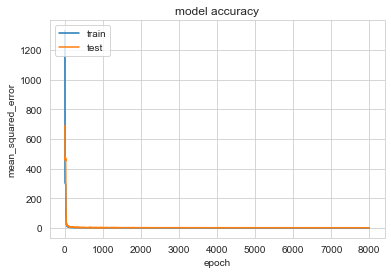

In [175]:
# optimum model test
from keras.callbacks import EarlyStopping


reX = scaler.transform(X_train)

model = Sequential()
model.add(Dense(46, input_dim=reX.shape[1], kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(46, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(46, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(20, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(3, kernel_initializer='normal', activation='leaky_relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)

#history = model.fit(reX, y_train, validation_split=0.2, epochs=5000, callbacks=[es])
history = model.fit(reX, y_train, validation_split=0.2, epochs=8000)

#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

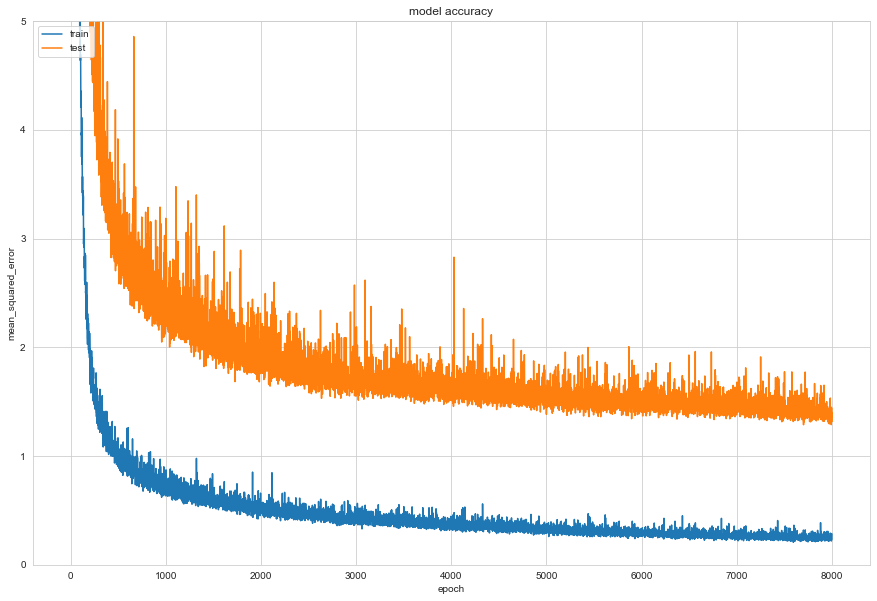

In [176]:
plt.figure(figsize=(15,10))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim([2000, 4300])
plt.ylim([0, 5])
plt.show()

In [177]:
Title = []
MAE4 = []
MSE4 = []
R24 = []

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#scaler = StandardScaler().fit(X_train)

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)


name = 'Neural_Network'
Title.append('%s' % name)
MAE4.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
MSE4.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
R24.append('%f' %  round(sm.r2_score(y_test,predictions),5))

In [178]:
y_test = y_test.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_test

,Target_L,Target_a,Target_b
0,36.57,-13.30,-21.99
1,30.19,4.93,3.64
2,36.93,-9.38,-19.34
3,46.02,-27.18,-8.00
4,72.47,-4.04,-19.31
...,...,...,...
741,36.75,-19.13,11.03
742,57.42,7.21,7.59
743,53.32,-15.65,1.84
744,56.11,-20.37,24.03


In [179]:
predictions = pd.DataFrame(predictions, columns = ['Pred_L','Pred_a','Pred_b'])
predictions

,Pred_L,Pred_a,Pred_b
0,36.235359,-12.626356,-20.509966
1,30.208000,4.834033,3.335556
2,36.974567,-9.458995,-18.976545
3,45.800343,-27.456305,-7.869228
4,71.875618,-4.695453,-20.072004
...,...,...,...
741,36.710293,-19.207151,10.827485
742,56.768723,7.958161,6.759812
743,53.266819,-15.555486,1.554173
744,55.358913,-20.711563,23.196022


In [180]:
F2_result = pd.DataFrame(Title)
F2_result.columns = ['Model']
F2_result['MAE'] = pd.DataFrame(MAE4)
F2_result['MSE'] = pd.DataFrame(MSE4)
F2_result['R2'] = pd.DataFrame(R24)
#F_result['Std'] = pd.DataFrame(round(sm.r2_score(y_test,predictions),5))

F2_result

,Model,MAE,MSE,R2
0,Neural_Network,0.694480,0.965630,0.997580


In [181]:
new_result = pd.concat((y_test, predictions),axis=1)
new_result['Delta_E'] = ((y_test['Target_L'] - predictions['Pred_L'])**2+(y_test['Target_a'] - predictions['Pred_a'])**2+(y_test['Target_b'] - predictions['Pred_b'])**2)**0.5 
new_result

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,36.57,-13.30,-21.99,36.235359,-12.626356,-20.509966,1.660205
1,30.19,4.93,3.64,30.208000,4.834033,3.335556,0.319718
2,36.93,-9.38,-19.34,36.974567,-9.458995,-18.976545,0.374601
3,46.02,-27.18,-8.00,45.800343,-27.456305,-7.869228,0.376424
4,72.47,-4.04,-19.31,71.875618,-4.695453,-20.072004,1.167715
...,...,...,...,...,...,...,...
741,36.75,-19.13,11.03,36.710293,-19.207151,10.827485,0.220321
742,57.42,7.21,7.59,56.768723,7.958161,6.759812,1.293491
743,53.32,-15.65,1.84,53.266819,-15.555486,1.554173,0.305710
744,56.11,-20.37,24.03,55.358913,-20.711563,23.196022,1.173165


In [182]:
test = new_result['Delta_E'].mean()
test

1.3831336240851602

In [183]:
new_result[new_result['Delta_E']<1.5].count()

Target_L    494
Target_a    494
Target_b    494
Pred_L      494
Pred_a      494
Pred_b      494
Delta_E     494
dtype: int64

In [184]:
acc = new_result[new_result['Delta_E']<1.5].count() / new_result.shape[0]
acc

Target_L    0.662198
Target_a    0.662198
Target_b    0.662198
Pred_L      0.662198
Pred_a      0.662198
Pred_b      0.662198
Delta_E     0.662198
dtype: float64

In [185]:
model.save("model.h5")

In [ ]:
model = load_model('model.h5')


In [ ]:
rescaledTrainX = scaler.transform(X_train)
predictions2 = model.predict(rescaledTrainX )

predictions2 = pd.DataFrame(predictions2, columns = ['Pred_L','Pred_a','Pred_b'])
predictions

In [396]:
y_train = y_train.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_train

,Target_L,Target_a,Target_b
0,38.05,-0.53,4.48
1,37.94,2.73,2.26
2,44.49,-7.80,-14.22
3,29.91,1.10,-0.58
4,75.23,-21.85,0.26
...,...,...,...
2952,36.27,-14.99,2.59
2953,53.92,8.37,36.26
2954,37.34,-16.63,9.54
2955,53.51,-0.71,38.33


In [397]:
new_result2 = pd.concat((y_train, predictions2),axis=1)
new_result2['Delta_E'] = ((y_train['Target_L'] - predictions2['Pred_L'])**2+(y_train['Target_a'] - predictions2['Pred_a'])**2+(y_train['Target_b'] - predictions2['Pred_b'])**2)**0.5 
new_result2

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,38.05,-0.53,4.48,37.995937,-0.249930,3.947091,0.604445
1,37.94,2.73,2.26,37.618969,2.875121,1.806372,0.574369
2,44.49,-7.80,-14.22,44.742062,-7.627464,-14.543411,0.444858
3,29.91,1.10,-0.58,29.780373,1.360380,-0.920955,0.448164
4,75.23,-21.85,0.26,74.327240,-22.011749,-0.490031,1.184772
...,...,...,...,...,...,...,...
2952,36.27,-14.99,2.59,35.755707,-15.215436,2.180257,0.695132
2953,53.92,8.37,36.26,51.672680,9.717175,34.636314,3.082480
2954,37.34,-16.63,9.54,37.223629,-16.007582,8.848435,0.937661
2955,53.51,-0.71,38.33,55.037285,-2.857278,39.031834,2.726898


In [398]:
test2 = new_result2['Delta_E'].mean()
test2

0.9282501077255471

In [399]:
new_result2[new_result2['Delta_E']<1.5].count()

Target_L    2610
Target_a    2610
Target_b    2610
Pred_L      2610
Pred_a      2610
Pred_b      2610
Delta_E     2610
dtype: int64

In [400]:
test = new_result2[new_result2['Delta_E']<1.5].count()/new_result2.shape[0]
test

Target_L    0.882651
Target_a    0.882651
Target_b    0.882651
Pred_L      0.882651
Pred_a      0.882651
Pred_b      0.882651
Delta_E     0.882651
dtype: float64

In [167]:
df = pd.read_csv('train.csv')
df

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,SR1,SR2,SR3,SW1,Base_L,Base_a,Base_b,Target_L,Target_a,Target_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,92.88,640.0,35.00,210.46,92.39,-0.14,0.73,46.83,50.45,20.89
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,...,993.00,0.0,22.15,0.00,92.39,-0.14,0.73,47.11,53.25,20.14
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,887.00,160.0,19.00,0.00,92.39,-0.14,0.73,46.31,54.08,21.40
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,...,0.00,818.0,0.00,122.00,92.39,-0.14,0.73,45.13,52.42,22.70
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,0.00,740.0,0.00,240.00,92.39,-0.14,0.73,46.09,52.08,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,179.0,0.0,...,153.00,0.0,0.00,636.00,92.39,-0.14,0.73,66.66,32.89,9.33
3729,0.0,700.0,0.0,0.0,85.0,110.0,0.0,0.0,0.0,0.0,...,160.00,0.0,0.00,190.00,94.21,-0.26,-0.35,29.20,-0.18,-2.12
3730,0.0,67.0,0.0,285.0,485.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,154.00,94.21,-0.26,-0.35,37.27,-17.70,-8.04
3731,0.0,60.0,0.0,0.0,0.0,540.0,0.0,0.0,0.0,0.0,...,0.00,0.0,107.00,324.00,94.21,-0.26,-0.35,50.57,9.70,18.97
